## DATA1030 Code

In [40]:
import pandas as pd
df = pd.read_csv('1030_df.csv')
#import the dataset
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [41]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [42]:
len(df)

192036

In [43]:
len(df)

192036

In [44]:
missing_values = df.isnull().sum()

print(missing_values)

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


## some cleaning before EDA

In [45]:
from math import radians, sin, cos, sqrt, atan2

# Haversine formula to calculate the distance between two points on the Earth
def haversine(lon1, lat1, lon2, lat2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    # Compute differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Distance in kilometers
    distance = R * c
    return distance
# Apply the Haversine formula to each row and create a new column for the distance
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [46]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month_name()
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_year,pickup_month,pickup_weekday,pickup_day,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,May,Thursday,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,July,Friday,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,August,Monday,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,June,Friday,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,August,Thursday,28,17


## EDA

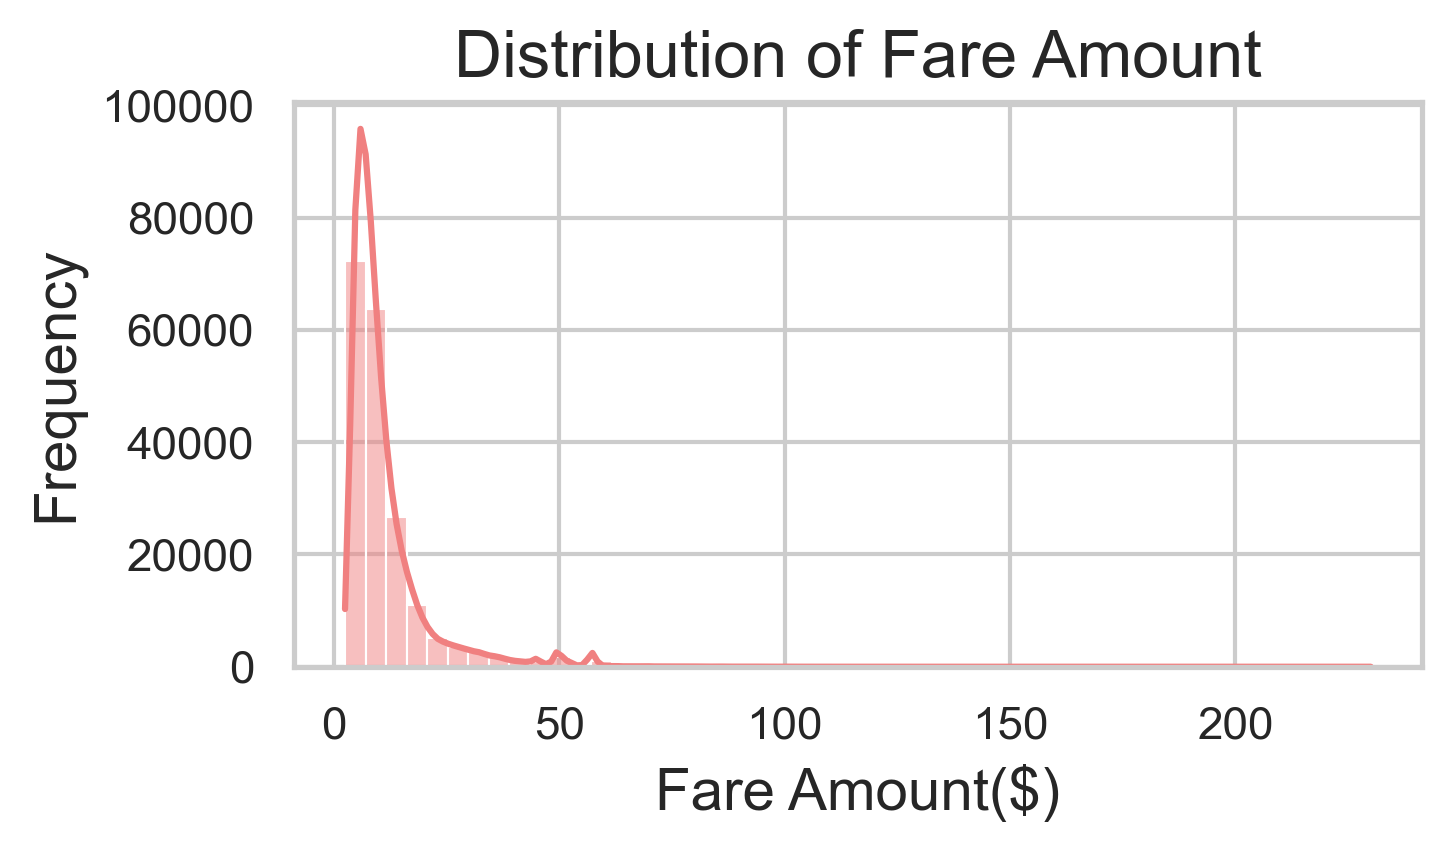

In [47]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(5, 3), dpi=300)  
sns.histplot(df['fare_amount'], bins=50, kde=True, color='lightcoral')  

plt.title('Distribution of Fare Amount', fontsize=16)
plt.xlabel('Fare Amount($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


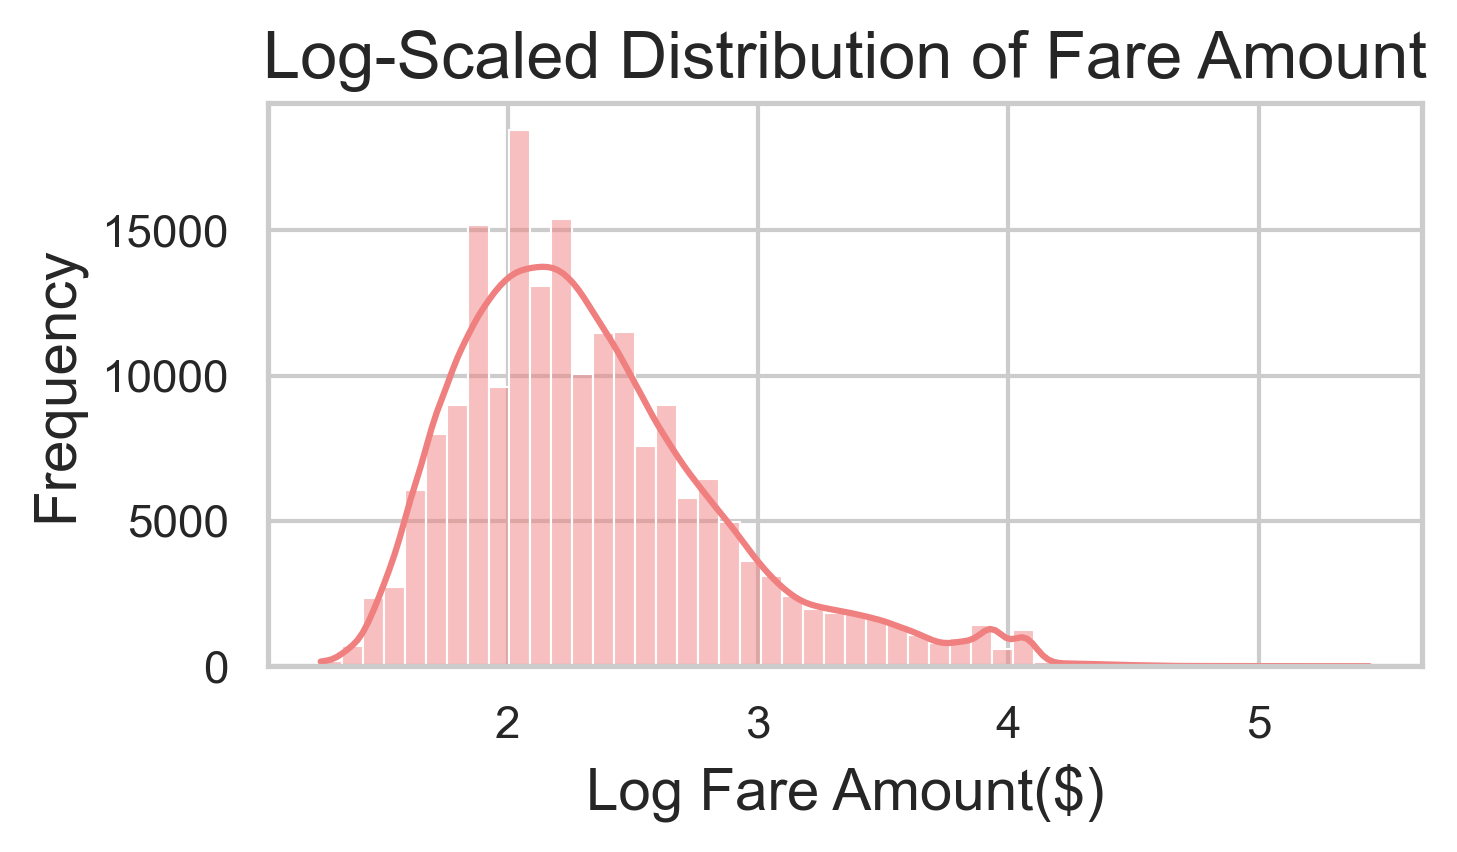

In [48]:

import numpy as np

sns.set(style="whitegrid")

# Apply log transformation to fare_amount
df['log_fare_amount'] = np.log1p(df['fare_amount'])  # log1p handles zero values by calculating log(1 + x)

plt.figure(figsize=(5, 3), dpi=300)
sns.histplot(df['log_fare_amount'], bins=50, kde=True, color='lightcoral') 

plt.title('Log-Scaled Distribution of Fare Amount', fontsize=16)
plt.xlabel('Log Fare Amount($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


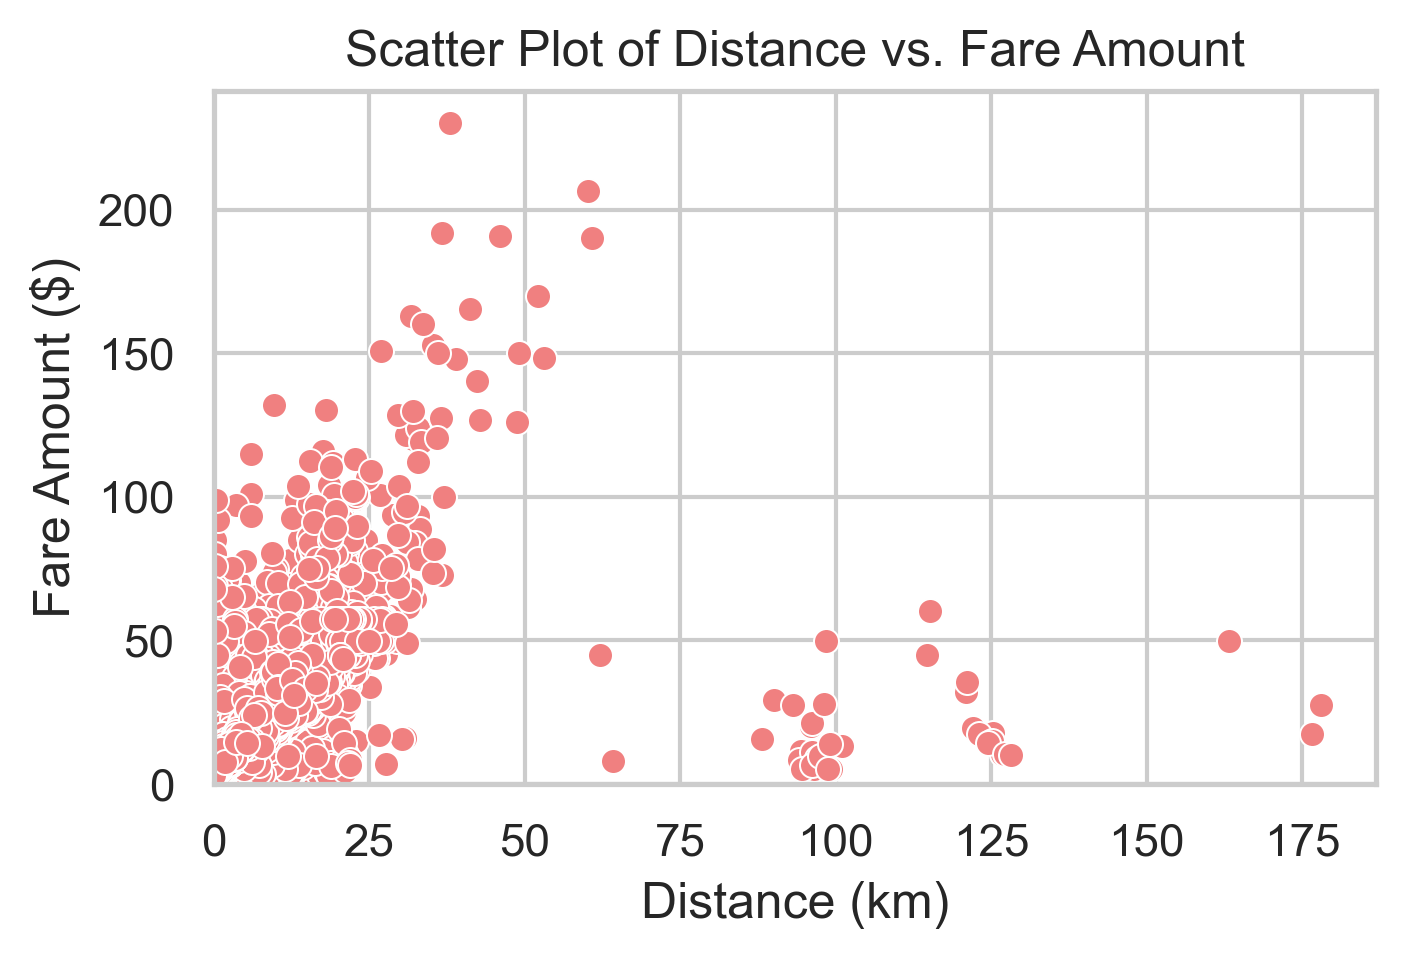

In [49]:
plt.figure(figsize=(5, 3), dpi=300)

sns.scatterplot(x=df['distance_km'], y=df['fare_amount'], color='lightcoral')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')

plt.title('Scatter Plot of Distance vs. Fare Amount')

plt.show() 

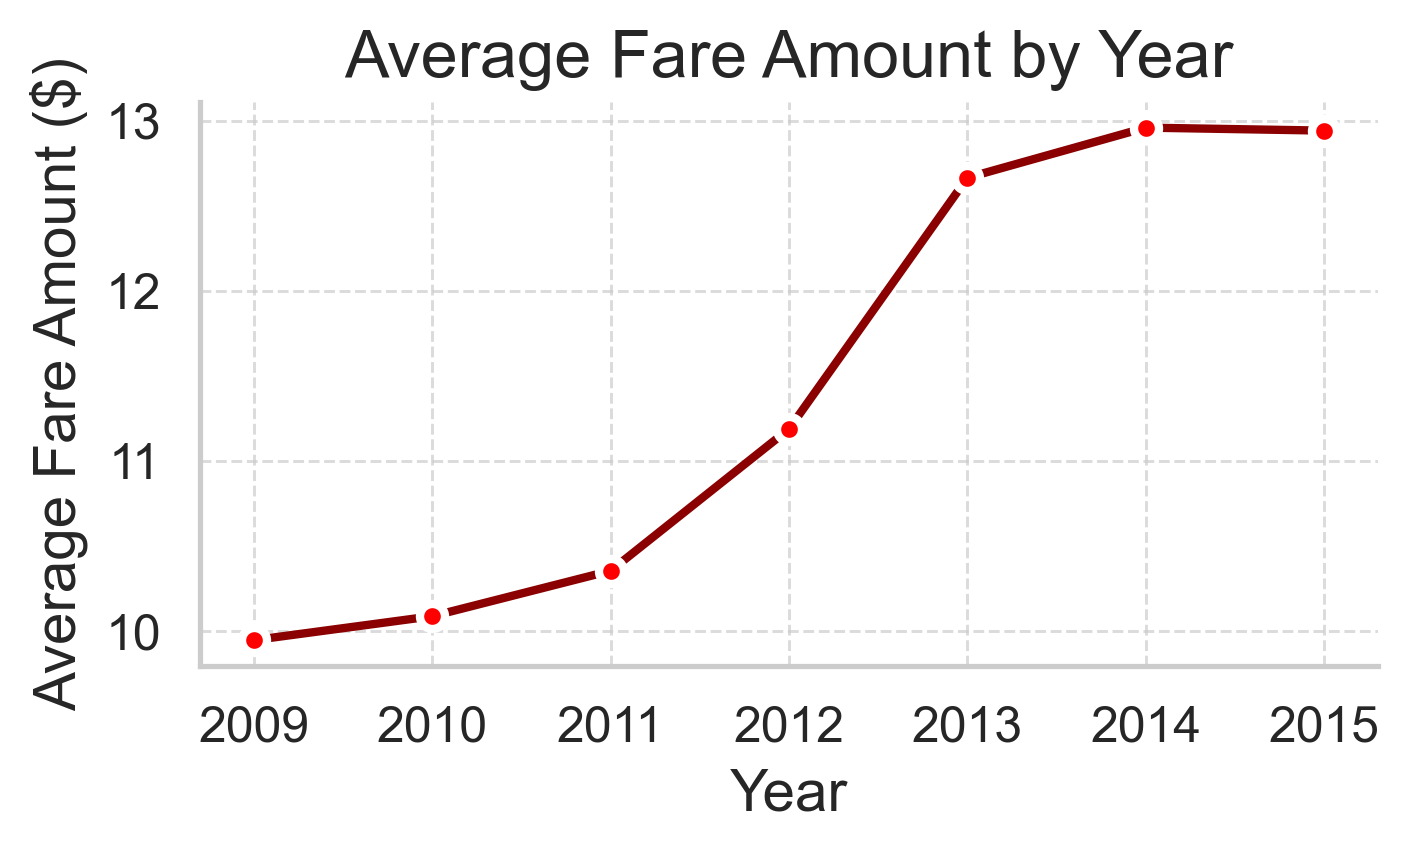

In [50]:
yearly_avg_fare = df.groupby('pickup_year')['fare_amount'].mean().reset_index()

sns.set(style="whitegrid", palette="Reds")

plt.figure(figsize=(5, 3), dpi=300)

sns.lineplot(x='pickup_year', y='fare_amount', data=yearly_avg_fare, marker='o', color='darkred', linewidth=2, markerfacecolor='red', markeredgewidth=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Fare Amount ($)', fontsize=14)
plt.title('Average Fare Amount by Year', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

plt.tight_layout()
plt.show()


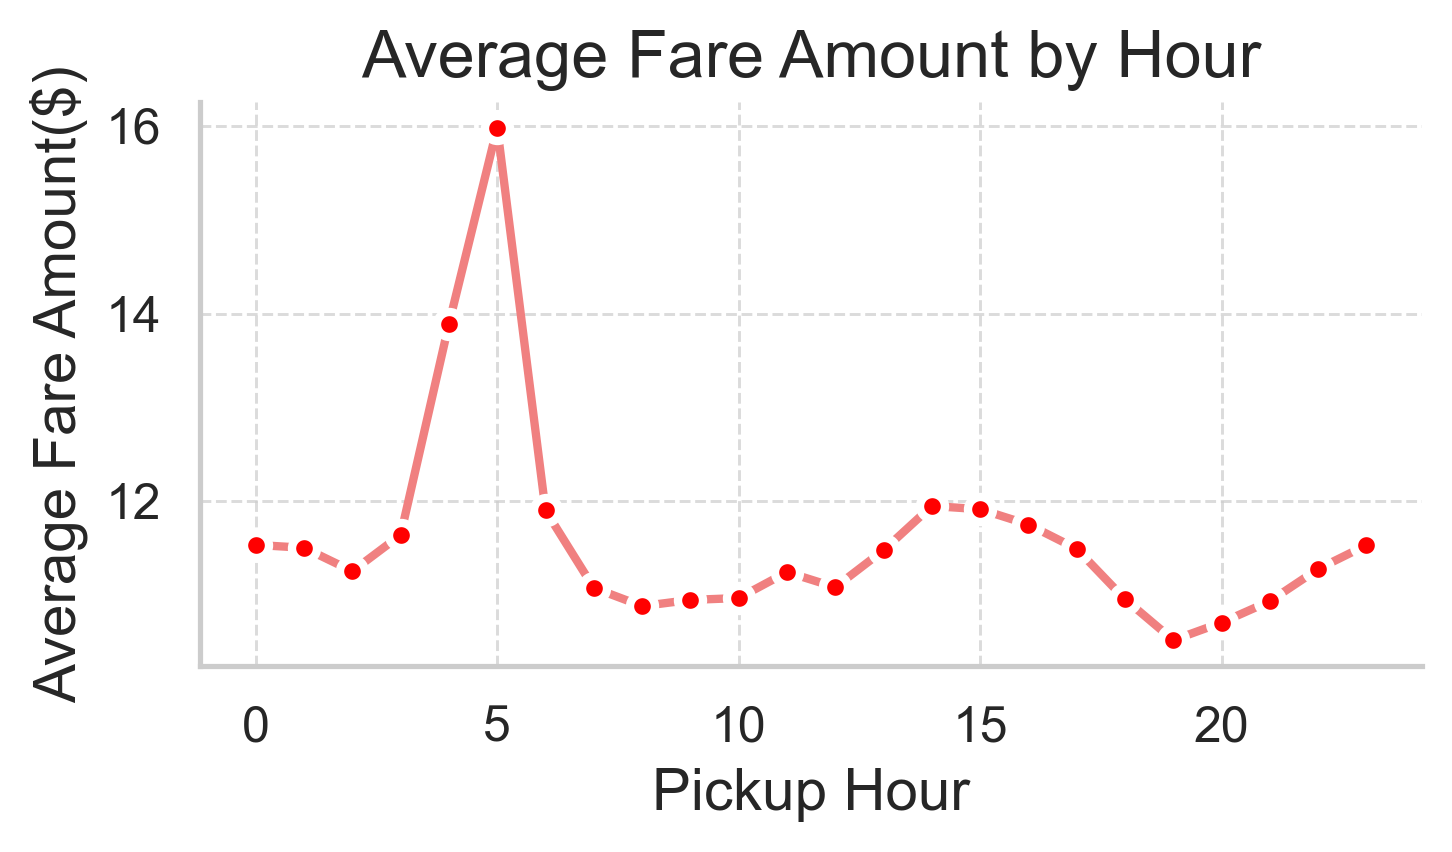

In [51]:
hourly_avg_fare = df.groupby('pickup_hour')['fare_amount'].mean().reset_index()

sns.set(style="whitegrid", palette="Reds")

plt.figure(figsize=(5, 3), dpi=300)

sns.lineplot(x='pickup_hour', y='fare_amount', data=hourly_avg_fare, marker='o', color='lightcoral', linewidth=2, markerfacecolor='red', markeredgewidth=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlabel('Pickup Hour', fontsize=14)
plt.ylabel('Average Fare Amount($)', fontsize=14)
plt.title('Average Fare Amount by Hour', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

plt.tight_layout()
plt.show()


In [52]:
df.drop(columns=['pickup_datetime'], inplace=True)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_year,pickup_month,pickup_weekday,pickup_day,pickup_hour,log_fare_amount
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,May,Thursday,7,19,2.140066
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,July,Friday,17,20,2.163323
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,August,Monday,24,21,2.631889
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,June,Friday,26,8,1.840550
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,August,Thursday,28,17,2.833213


## Final presentation Code

In [53]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [54]:
# Full dataset
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

subsample_frac = 1  # Adjust fraction as needed (e.g., 10% of the data)
X_subsample = X.sample(frac=subsample_frac, random_state=42)
y_subsample = y.loc[X_subsample.index]

print(f"Subsampled Data Size: {X_subsample.shape[0]}")


# Define preprocessing steps
onehot_ftrs = ['pickup_month', 'pickup_weekday', 'pickup_day', 'pickup_year']
minmax_ftrs = ['pickup_hour', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
std_ftrs = ['distance_km', 'passenger_count']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])


######for display the feature names only#######
X_encoded = preprocessor.fit_transform(X_subsample)

# Get feature names after one-hot encoding (for the categorical features)
onehot_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(onehot_ftrs)

# Combine all feature names
encoded_feature_names = np.concatenate([onehot_feature_names, minmax_ftrs, std_ftrs])

# Print the number of features and the feature names
print(f"Number of features after encoding: {X_encoded.shape[1]}")
print("Feature names after encoding:")
print(encoded_feature_names)




Subsampled Data Size: 192036
Number of features after encoding: 64
Feature names after encoding:
['pickup_month_April' 'pickup_month_August' 'pickup_month_December'
 'pickup_month_February' 'pickup_month_January' 'pickup_month_July'
 'pickup_month_June' 'pickup_month_March' 'pickup_month_May'
 'pickup_month_November' 'pickup_month_October' 'pickup_month_September'
 'pickup_weekday_Friday' 'pickup_weekday_Monday' 'pickup_weekday_Saturday'
 'pickup_weekday_Sunday' 'pickup_weekday_Thursday'
 'pickup_weekday_Tuesday' 'pickup_weekday_Wednesday' 'pickup_day_1'
 'pickup_day_2' 'pickup_day_3' 'pickup_day_4' 'pickup_day_5'
 'pickup_day_6' 'pickup_day_7' 'pickup_day_8' 'pickup_day_9'
 'pickup_day_10' 'pickup_day_11' 'pickup_day_12' 'pickup_day_13'
 'pickup_day_14' 'pickup_day_15' 'pickup_day_16' 'pickup_day_17'
 'pickup_day_18' 'pickup_day_19' 'pickup_day_20' 'pickup_day_21'
 'pickup_day_22' 'pickup_day_23' 'pickup_day_24' 'pickup_day_25'
 'pickup_day_26' 'pickup_day_27' 'pickup_day_28' 'pickup_

In [55]:
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):

    nr_states = 5
    test_scores = []
    best_models = []

    overall_start_time = time.time()

    for random_state in range(nr_states):
        print(f"Running iteration {random_state + 1} with random state: {random_state}")

        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True)
        print(f"Train set size: {X_other.shape}, Test set size: {X_test.shape}")

        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        pipe = make_pipeline(preprocessor, ML_algo)

        grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_root_mean_squared_error',
                            cv=kf, return_train_score=True, n_jobs=-1, verbose=True)
        
        grid.fit(X_other, y_other)


        print(f"Best parameters: {grid.best_params_}")
        print(f"Best RMSE on validation set: {-grid.best_score_}")


        best_model = grid.best_estimator_
        best_models.append(best_model)

        y_test_pred = best_model.predict(X_test)


        
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_scores.append(test_rmse)
        print(f"Test RMSE: {test_rmse}")
        
    overall_end_time = time.time()
    print(f"\nTotal training and prediction duration for all iterations for the model of {ML_algo}: {overall_end_time - overall_start_time:.2f} seconds")

    
    mean_rmse = np.mean(test_scores)
    std_rmse = np.std(test_scores)
    print(f"\nAverage Test RMSE: {mean_rmse:.4f}")
    print(f"Standard Deviation of Test RMSE: {std_rmse:.4f}")

    return test_scores, best_models


In [60]:
lasso_param_grid = {
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

elasticnet_param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

xgb_param_grid = {
    'xgbregressor__n_estimators': [100],
    'xgbregressor__max_depth': [1, 3, 10, 20],
    'xgbregressor__reg_alpha': [0.0, 0.01, 0.1, 1.0, 10.0, 100.0], 
    'xgbregressor__reg_lambda': [0.0, 0.01, 0.1, 1.0, 10.0, 100.0], 
    'xgbregressor__learning_rate': [0.05, 0.1, 0.2],
    'xgbregressor__subsample': [0.9],
    'xgbregressor__colsample_bytree': [0.66],
}


rf_param_grid = {
    'randomforestregressor__n_estimators': [100],  
    'randomforestregressor__max_depth': [1, 3, 10, 20],      
    'randomforestregressor__max_features': [0.25, 0.5, 0.75, 1.0], 
}

knn_param_grid = {
    'kneighborsregressor__n_neighbors': [1, 5, 10, 100, 1000], 
    'kneighborsregressor__weights': ['uniform', 'distance']   
}

In [61]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)
elasticnet_model = ElasticNet(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
knn_model = KNeighborsRegressor()


# Lasso Regression
lasso_test_scores, lasso_final_models = MLpipe_KFold_RMSE(X_subsample, y_subsample, preprocessor, lasso_model, lasso_param_grid)

# Ridge Regression
ridge_test_scores,ridge_final_models = MLpipe_KFold_RMSE(X_subsample, y_subsample, preprocessor, ridge_model, ridge_param_grid)

# Elastic Net
elasticnet_test_scores, elasticnet_final_models = MLpipe_KFold_RMSE(X_subsample, y_subsample, preprocessor, elasticnet_model, elasticnet_param_grid)

# xgboosting
xgb_test_scores, xgb_final_models = MLpipe_KFold_RMSE(X_subsample, y_subsample, preprocessor, xgb_model, xgb_param_grid)

#k-Nearest Neighbors Regressor
knn_test_scores,knn_final_models = MLpipe_KFold_RMSE(X_subsample, y_subsample, preprocessor, knn_model, knn_param_grid)

# Random Forest Regressor
rf_test_scores, rf_final_models = MLpipe_KFold_RMSE(X_subsample, y_subsample, preprocessor, rf_model, rf_param_grid)


# Print summary of test scores for each model
print("Lasso Reg
ression Test Scores:", lasso_test_scores)
print("Ridge Regression Test Scores:", ridge_test_scores)
print("Elastic Net Test Scores:", elasticnet_test_scores)
print("XGBoost Test Scores:", xgb_test_scores)
print("Random Forest Test Scores:", rf_test_scores)
print("k-NN Test Scores:", knn_test_scores)

Running iteration 1 with random state: 0
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters: {'lasso__alpha': 0.01}
Best RMSE on validation set: 4.996991859660616
Test RMSE: 5.76121742411454
Running iteration 2 with random state: 1
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters: {'lasso__alpha': 0.01}
Best RMSE on validation set: 5.1189243655078895
Test RMSE: 5.304565936966878
Running iteration 3 with random state: 2
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters: {'lasso__alpha': 0.01}
Best RMSE on validation set: 5.141172214425661
Test RMSE: 5.2313694681745595
Running iteration 4 with random state: 3
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters: {'

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'xgbregressor__colsample_bytree': 0.66, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 10, 'xgbregressor__n_estimators': 100, 'xgbregressor__reg_alpha': 100.0, 'xgbregressor__reg_lambda': 10.0, 'xgbregressor__subsample': 0.9}
Best RMSE on validation set: 3.2114797291750303
Test RMSE: 3.1562416272139275
Running iteration 2 with random state: 1
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 432 candidates, totalling 1728 fits
Best parameters: {'xgbregressor__colsample_bytree': 0.66, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 10, 'xgbregressor__n_estimators': 100, 'xgbregressor__reg_alpha': 100.0, 'xgbregressor__reg_lambda': 1.0, 'xgbregressor__subsample': 0.9}
Best RMSE on validation set: 3.1773312879088618
Test RMSE: 3.305463595815838
Running iteration 3 with random state: 2
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 432 candidates, totalling 1728 fits
Be

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}
Best RMSE on validation set: 4.405607459244182
Test RMSE: 4.341303818008097

Total training and prediction duration for all iterations for the model of KNeighborsRegressor(): 2843.01 seconds

Average Test RMSE: 4.3911
Standard Deviation of Test RMSE: 0.0707
Running iteration 1 with random state: 0
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 16 candidates, totalling 64 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__n_estimators': 100}
Best RMSE on validation set: 3.2944413125802448
Test RMSE: 3.2495577369502837
Running iteration 2 with random state: 1
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__n_estimators': 100}
Best RMSE on validation set: 3.260945782895278
Test RMSE: 3.338681793555698
Running iteration 3 with random state: 2
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 16 candidates, totalling 64 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__n_estimators': 100}
Best RMSE on validation set: 3.2739329551104306
Test RMSE: 3.4139913203208994
Running iteration 4 with random state: 3
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__n_estimators': 100}
Best RMSE on validation set: 3.270583147403395
Test RMSE: 3.3569240949039574
Running iteration 5 with random state: 4
Train set size: (153628, 12), Test set size: (38408, 12)
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__n_estimators': 100}
Best RMSE on validation set: 3.323675978715013
Test RMSE: 3.183224904407599

Total traini

In [62]:
model_names = ["Lasso Regression", "Ridge Regression", "Elastic Net", "XGBoost", "k-NN", "Random Forest"]
test_scores_list = [lasso_test_scores, ridge_test_scores, elasticnet_test_scores, xgb_test_scores, knn_test_scores, rf_test_scores]

summary = {}
for name, scores in zip(model_names, test_scores_list):
    summary[name] = {
        "Mean RMSE": np.mean(scores),
        "Std Dev RMSE": np.std(scores)
    }

print("\nSummary Statistics for Each Model:")
for model, stats in summary.items():
    print(f"{model} - Mean RMSE: {stats['Mean RMSE']:.4f}, Std Dev RMSE: {stats['Std Dev RMSE']:.4f}")

best_model = min(summary, key=lambda x: summary[x]["Mean RMSE"])
print(f"\nThe best model on the uber dataset based on mean RMSE is: {best_model}")
print(f"Mean RMSE: {summary[best_model]['Mean RMSE']:.4f}, Std Dev RMSE: {summary[best_model]['Std Dev RMSE']:.4f}")


Summary Statistics for Each Model:
Lasso Regression - Mean RMSE: 5.4223, Std Dev RMSE: 0.2487
Ridge Regression - Mean RMSE: 5.3978, Std Dev RMSE: 0.2492
Elastic Net - Mean RMSE: 5.4187, Std Dev RMSE: 0.2443
XGBoost - Mean RMSE: 3.2607, Std Dev RMSE: 0.1073
k-NN - Mean RMSE: 4.3911, Std Dev RMSE: 0.0707
Random Forest - Mean RMSE: 3.3085, Std Dev RMSE: 0.0819

The best model on the uber dataset based on mean RMSE is: XGBoost
Mean RMSE: 3.2607, Std Dev RMSE: 0.1073


## baseline model

In [63]:
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#baseline calculation
from sklearn.metrics import mean_squared_error
import numpy as np

mean_train = np.mean(y_train)  # Mean of the target in the training set

y_pred_baseline = np.full_like(y_test, mean_train)

# Calculate RMSE for baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print(f"Baseline RMSE: {baseline_rmse:.4f}")

mean_train

Baseline RMSE: 9.4874


11.31902517770198

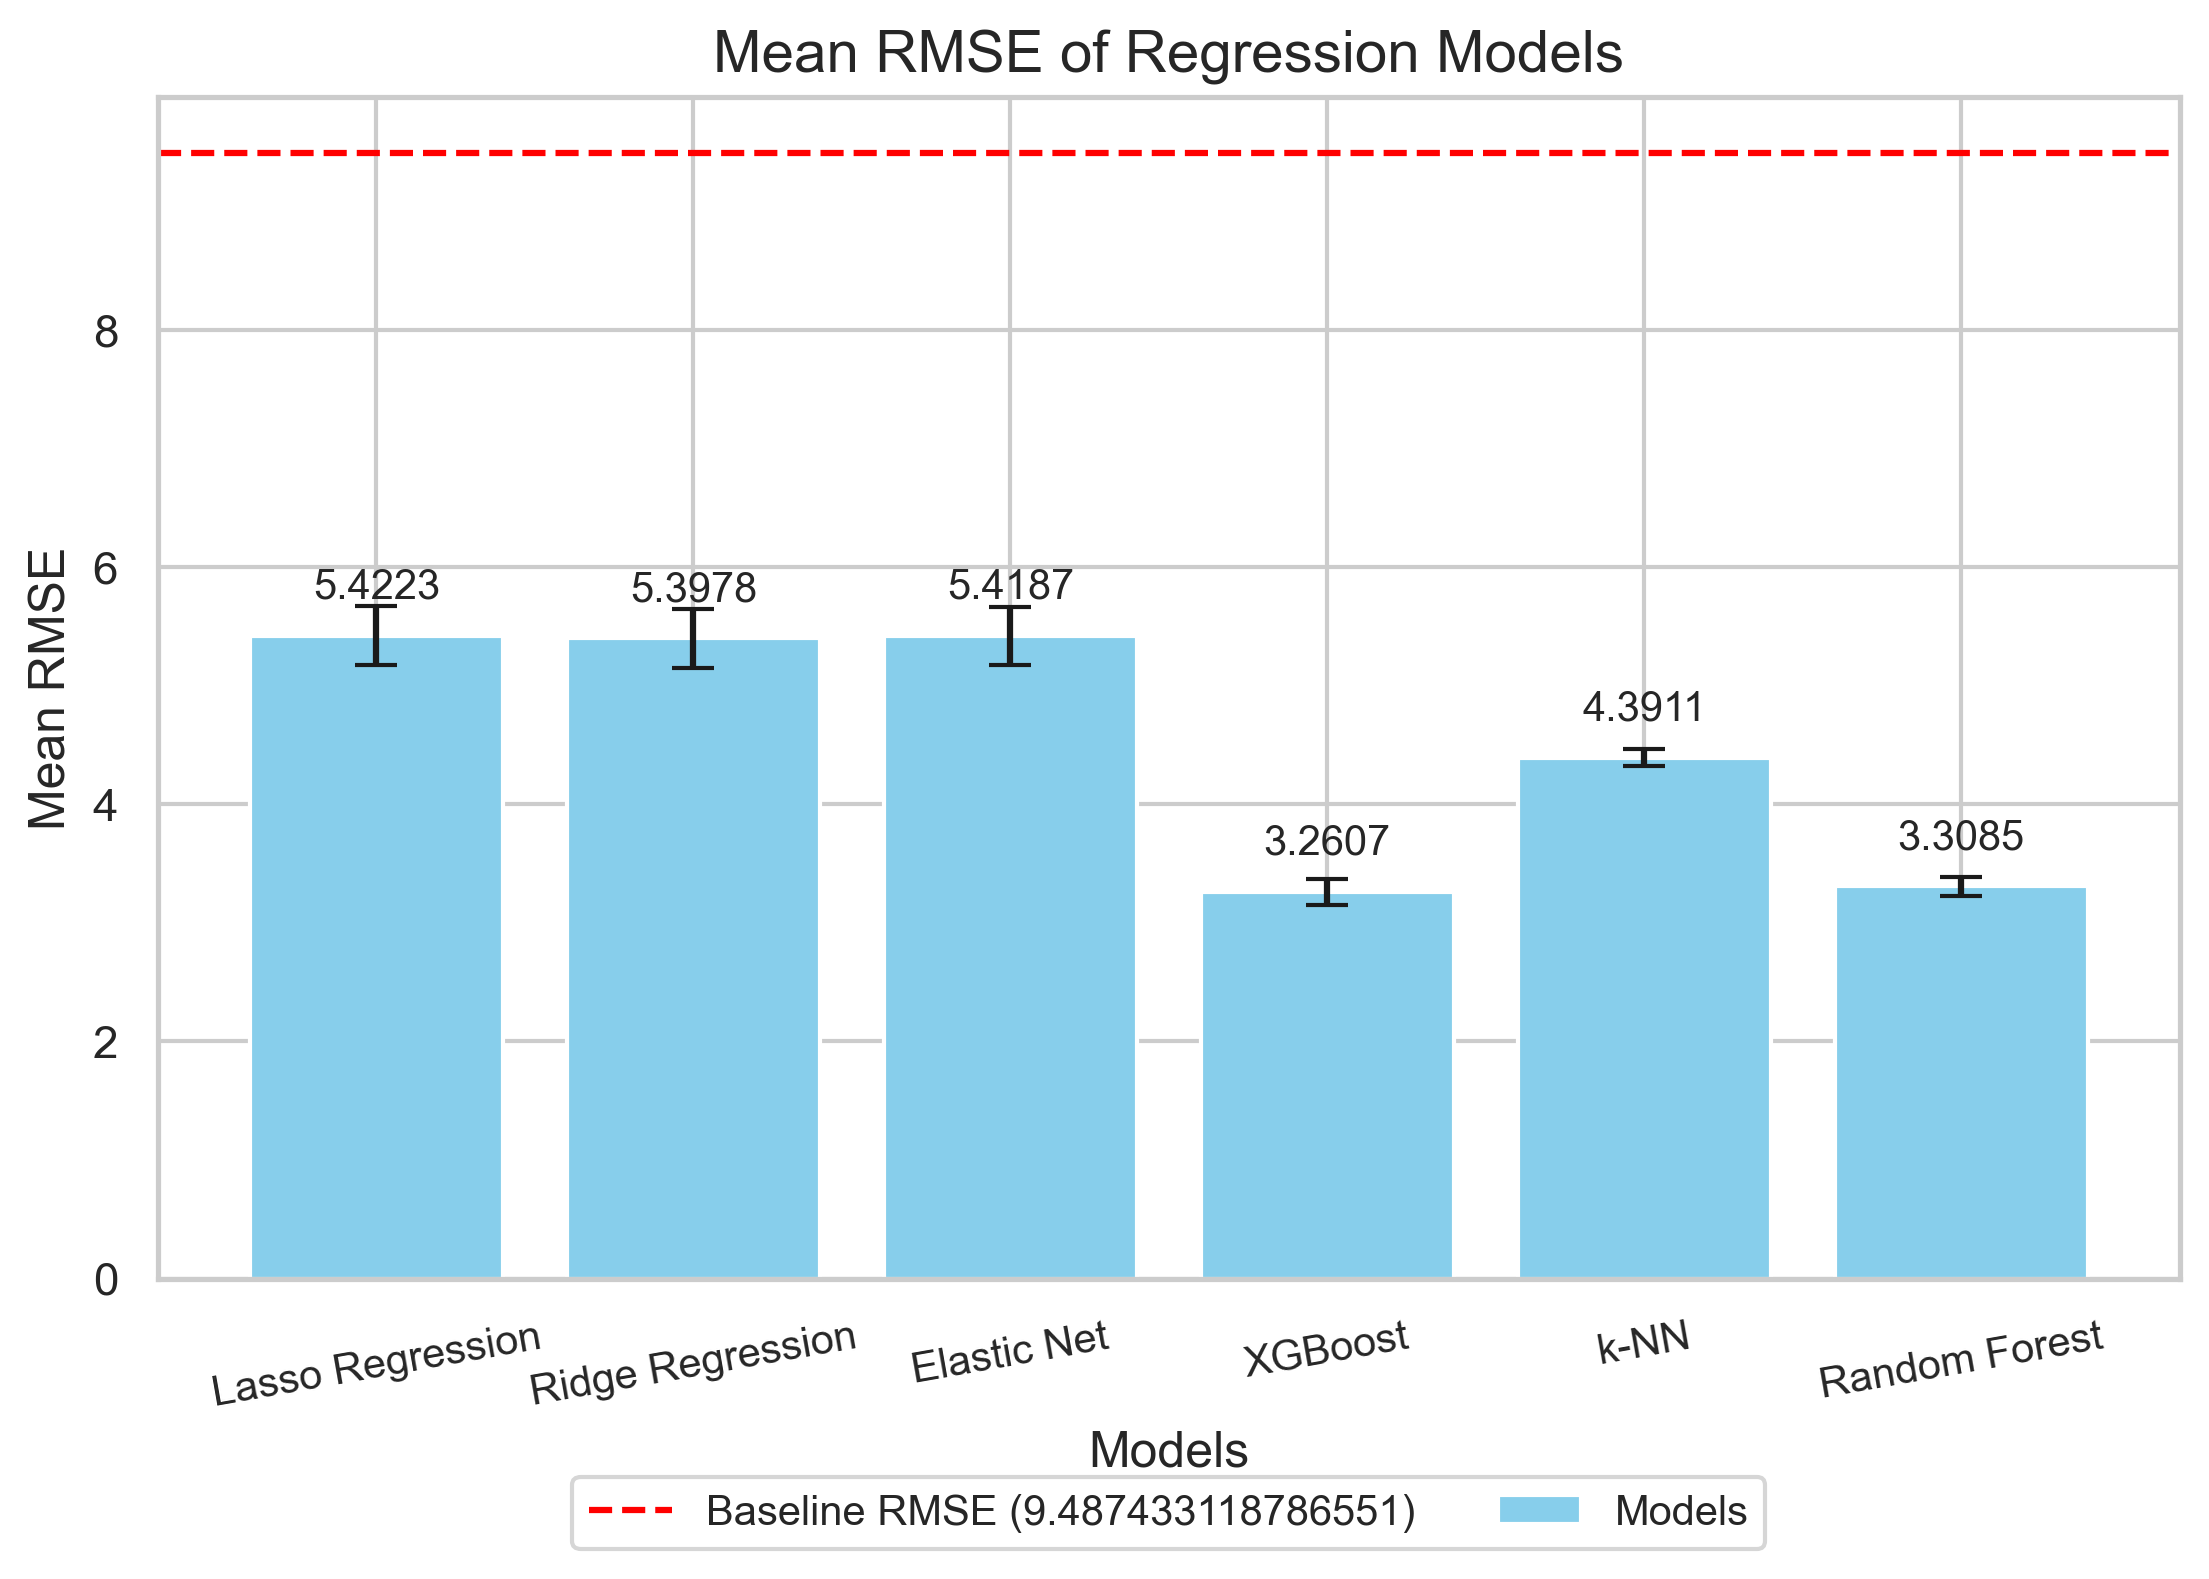

In [64]:
import matplotlib.pyplot as plt

models = list(summary.keys())
mean_rmse = [stats["Mean RMSE"] for stats in summary.values()]
std_rmse = [stats["Std Dev RMSE"] for stats in summary.values()]

plt.figure(figsize=(8, 6), dpi=300)

bars = plt.bar(models, mean_rmse, color='skyblue', yerr=std_rmse, capsize=5, label='Models')

# Adding the baseline RMSE line
plt.axhline(baseline_rmse, color='red', linestyle='--', linewidth=1.5, label=f'Baseline RMSE ({baseline_rmse})')

plt.title('Mean RMSE of Regression Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Mean RMSE', fontsize=12)
plt.xticks(rotation=10, fontsize=10)

# Reposition legend completely outside the plot at the very bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)

# Displaying text significantly higher above the error bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + max(std_rmse) * 1, round(yval, 4), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout(pad=2.5)  # Add padding to ensure everything fits
plt.show()


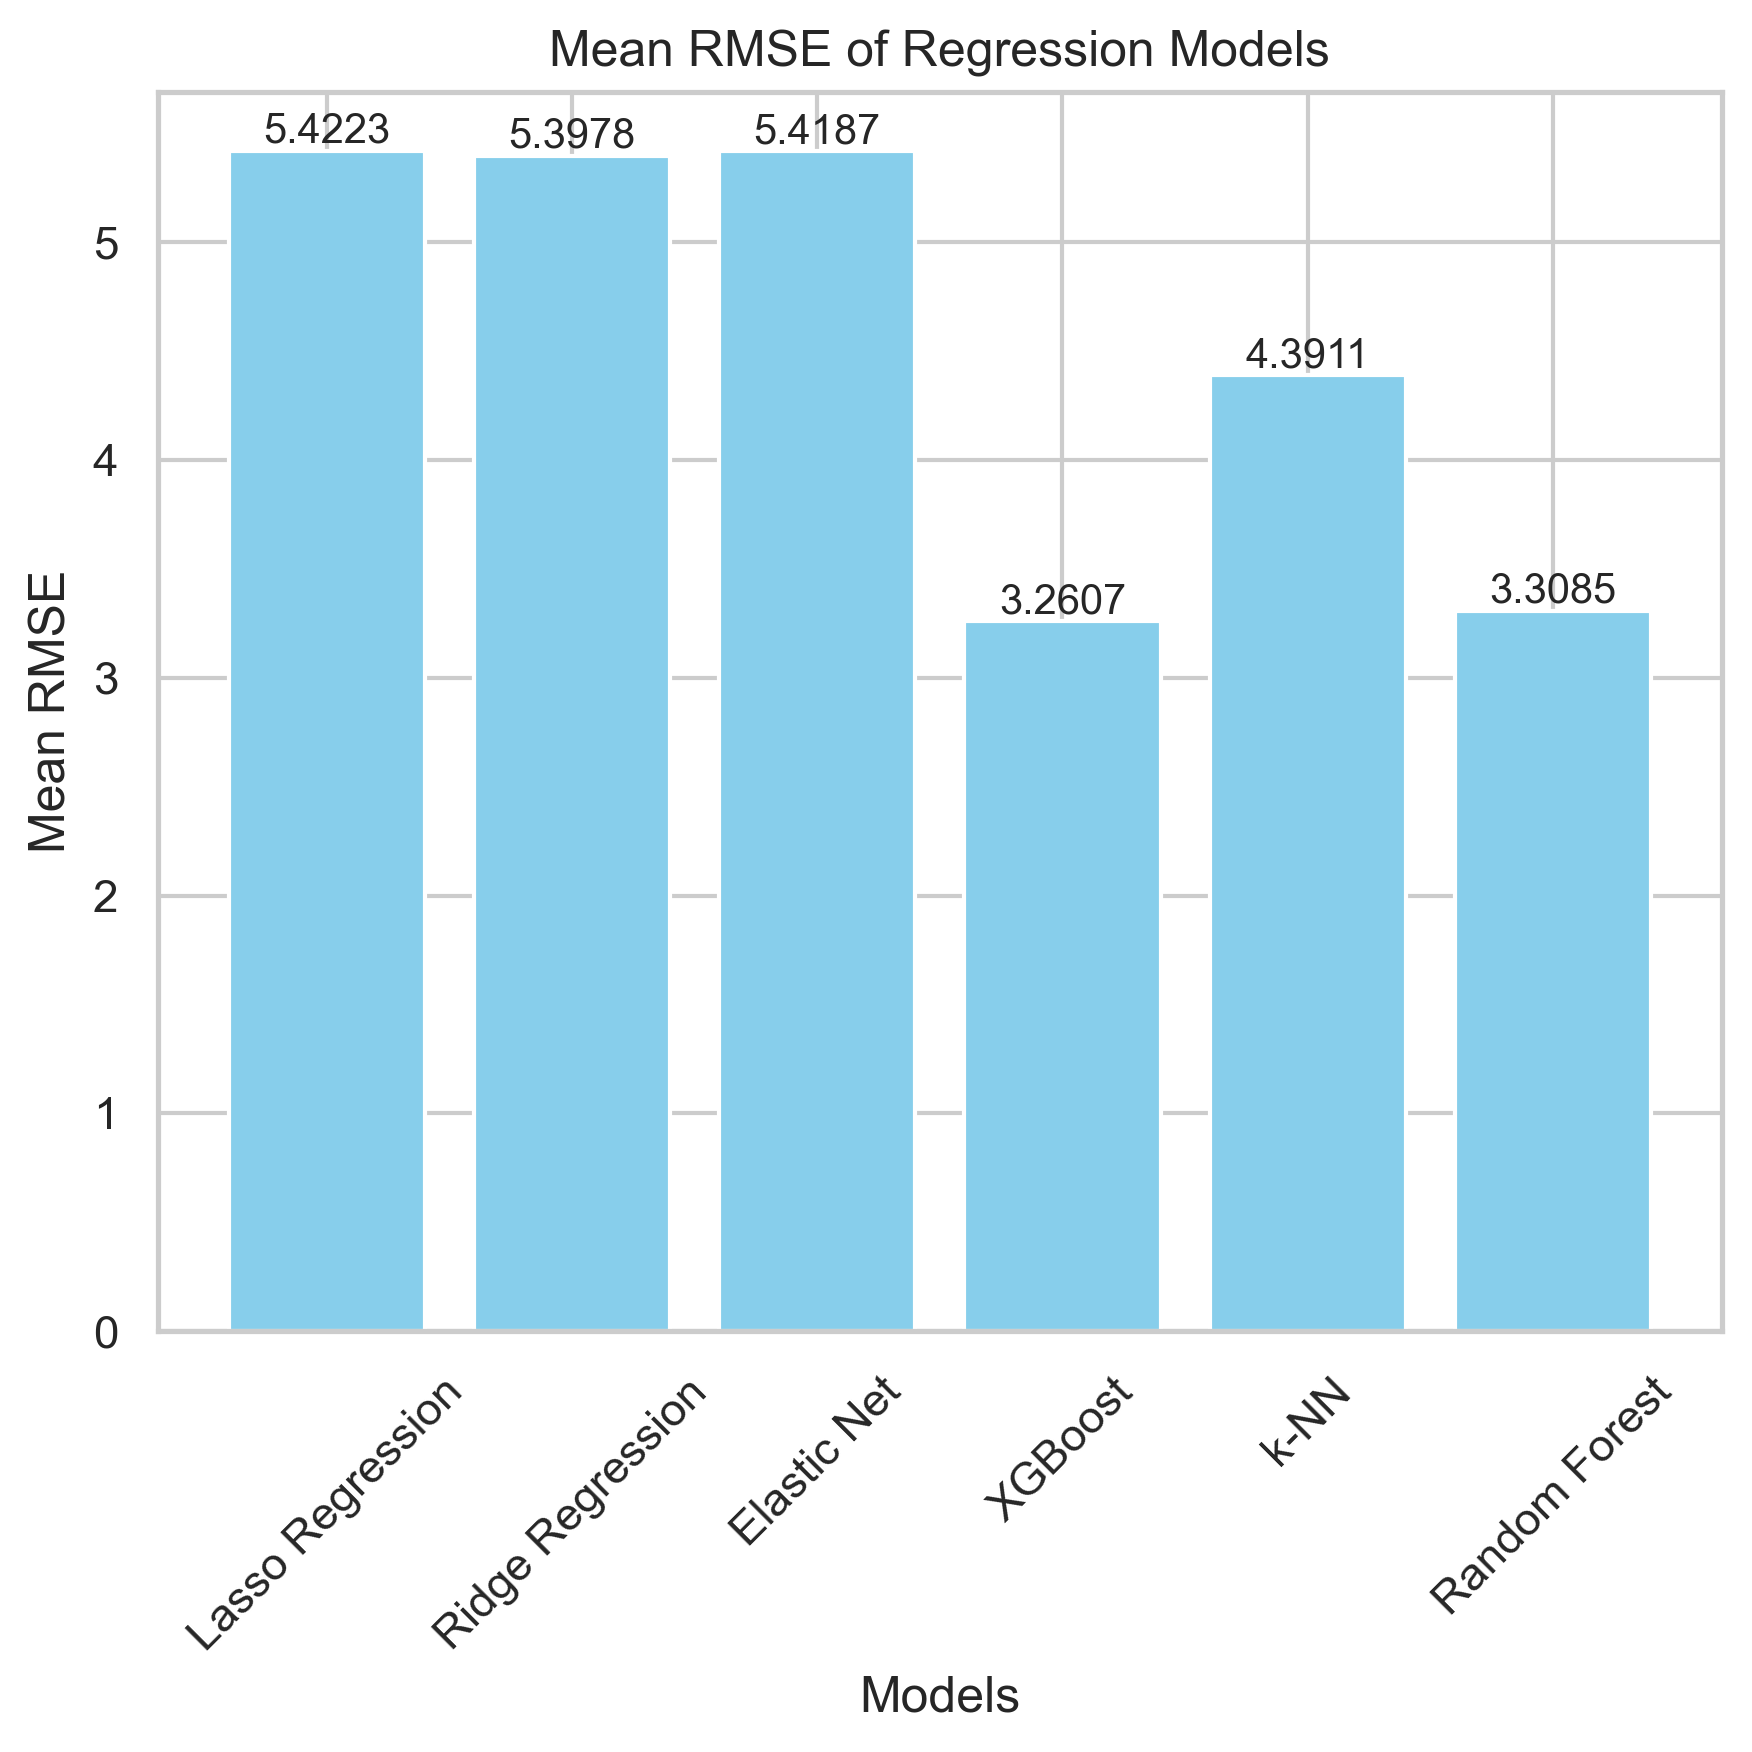

In [68]:
import matplotlib.pyplot as plt

models = list(summary.keys())
mean_rmse = [stats["Mean RMSE"] for stats in summary.values()]
std_rmse = [stats["Std Dev RMSE"] for stats in summary.values()]

plt.figure(figsize=(6, 6), dpi=300)
bars = plt.bar(models, mean_rmse, color='skyblue')
plt.title('Mean RMSE of Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean RMSE')
plt.xticks(rotation=45)

# Adding the numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


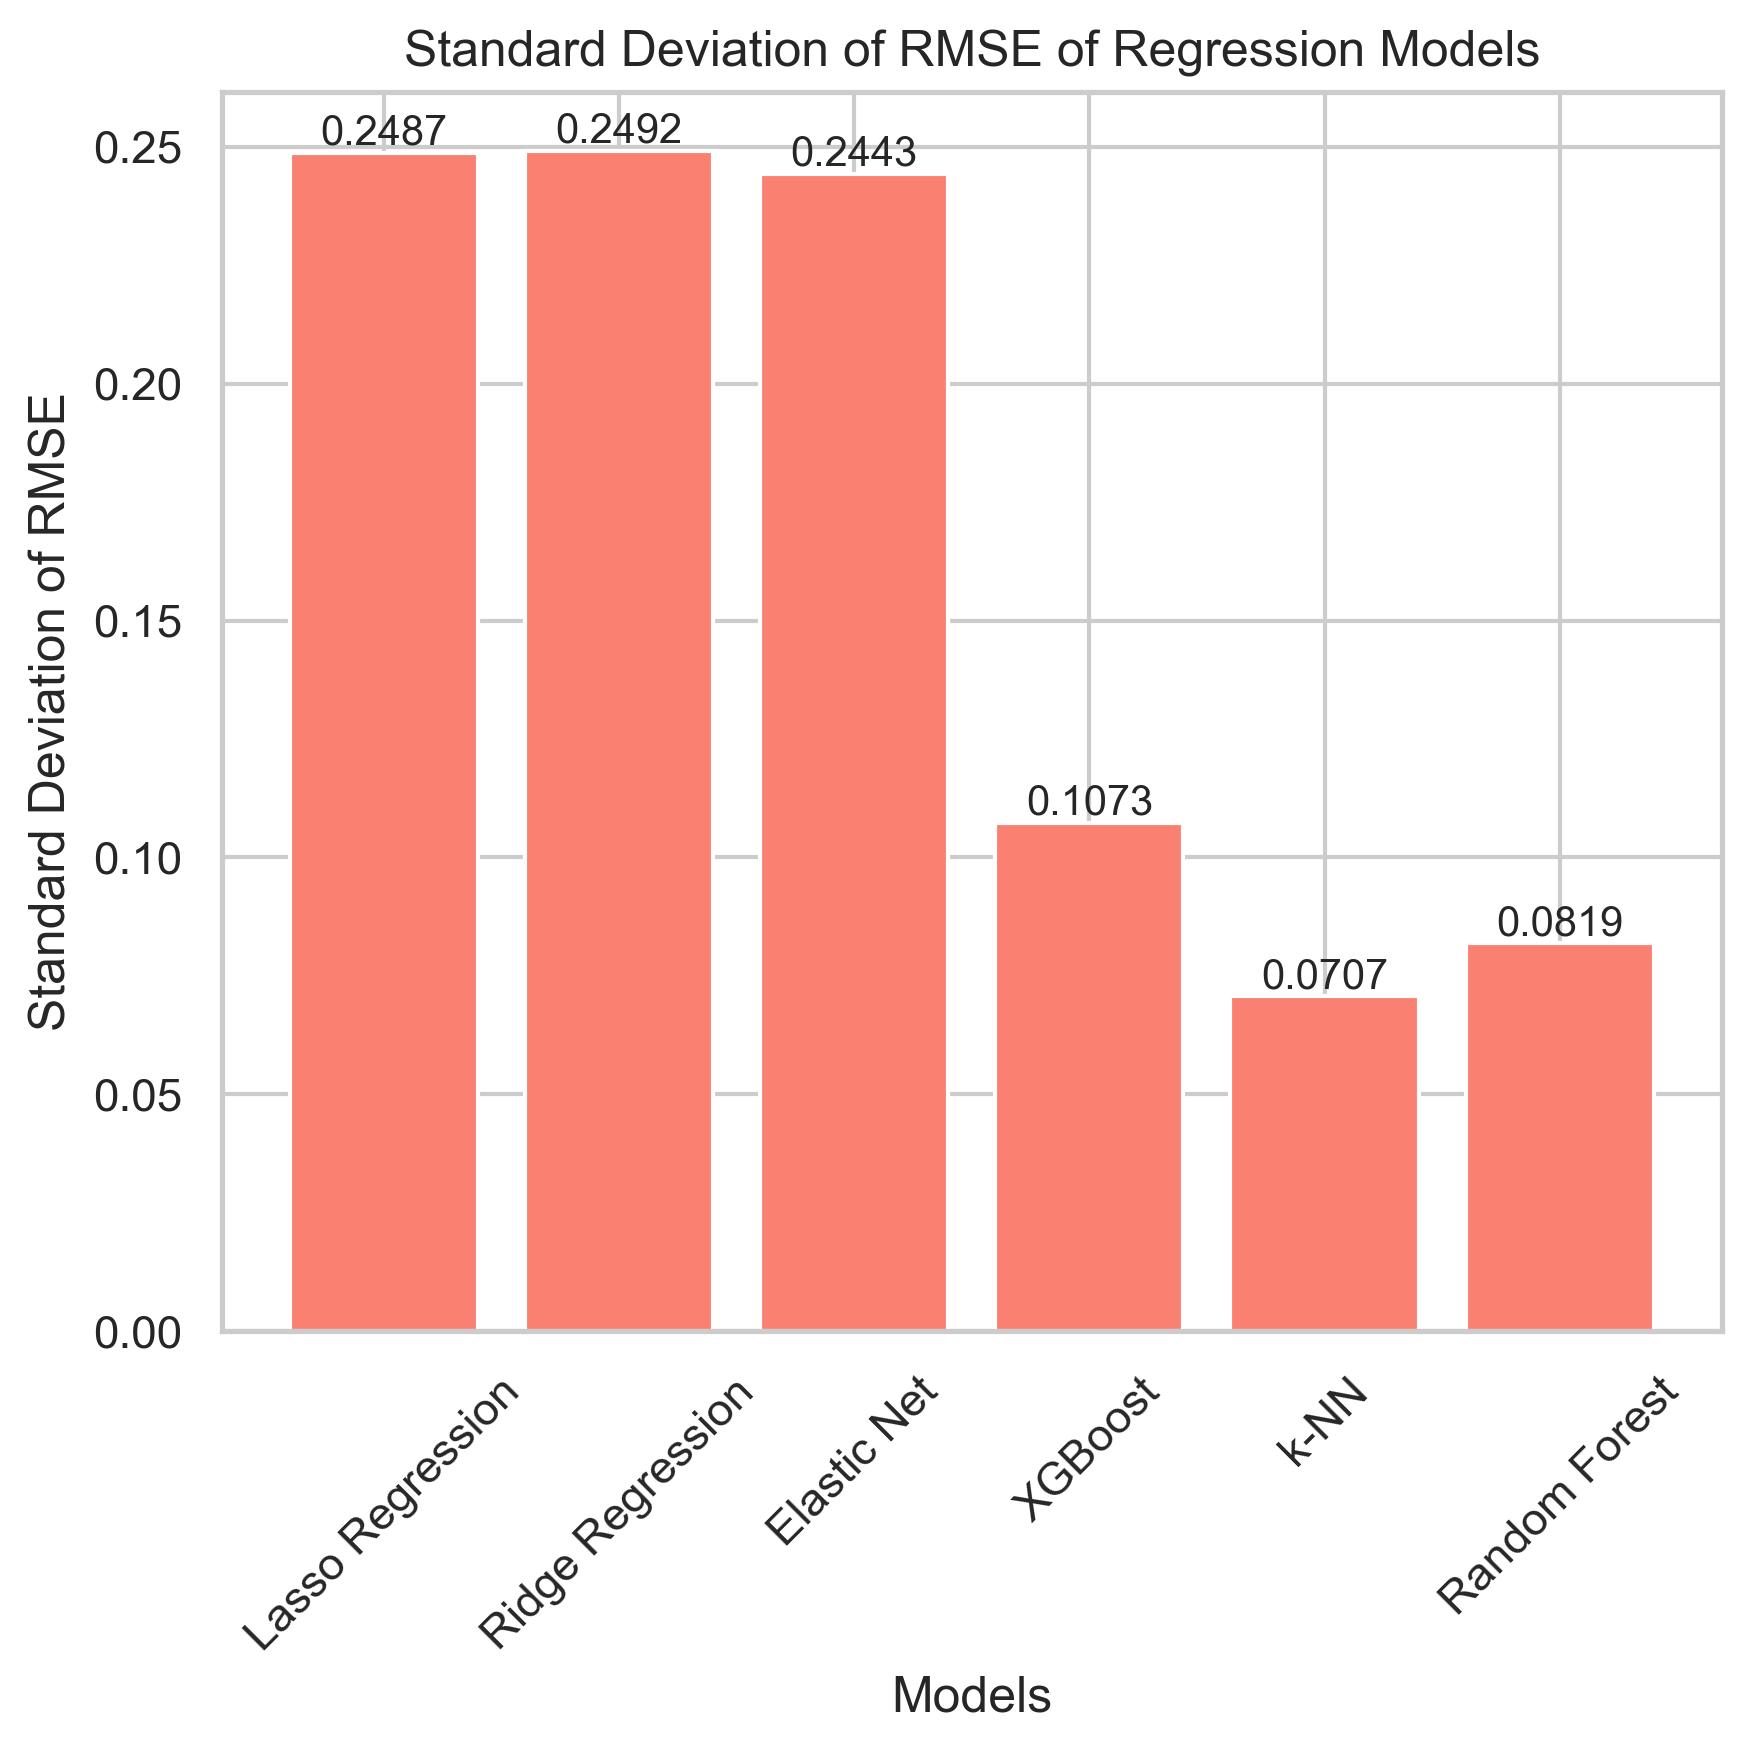

In [66]:
import matplotlib.pyplot as plt

models = list(summary.keys())
std_rmse = [stats["Std Dev RMSE"] for stats in summary.values()]

plt.figure(figsize=(6, 6), dpi=300)
bars = plt.bar(models, std_rmse, color='salmon')
plt.title('Standard Deviation of RMSE of Regression Models')
plt.xlabel('Models')
plt.ylabel('Standard Deviation of RMSE')
plt.xticks(rotation=45)

# Adding the numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## re-train the best model

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from tqdm import tqdm  # Import tqdm for progress bar
import time  # Import time for start and end time logging

# Full dataset
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


# Best hyperparameters
best_xgb_params = {
    'xgbregressor__colsample_bytree': 0.66, 
    'xgbregressor__learning_rate': 0.2, 
    'xgbregressor__max_depth': 10, 
    'xgbregressor__n_estimators': 100, 
    'xgbregressor__reg_alpha': 100.0, 
    'xgbregressor__reg_lambda': 1.0, 
    'xgbregressor__subsample': 0.9
}

# Create the XGB model with the best hyperparameters
xgb_model = xgb.XGBRegressor(
    colsample_bytree=best_xgb_params['xgbregressor__colsample_bytree'],
    learning_rate=best_xgb_params['xgbregressor__learning_rate'],
    max_depth=best_xgb_params['xgbregressor__max_depth'],
    n_estimators=best_xgb_params['xgbregressor__n_estimators'],
    reg_alpha=best_xgb_params['xgbregressor__reg_alpha'],
    reg_lambda=best_xgb_params['xgbregressor__reg_lambda'],
    subsample=best_xgb_params['xgbregressor__subsample']
    
)


# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# Start time for training
start_time_train = time.time()

# Train the model on the training set with a progress bar
print("Training the model...")
for _ in tqdm(range(1), desc="Training Progress"):  # Single iteration, but it will show progress
    pipeline.fit(X_train, y_train)

# End time for training
end_time_train = time.time()

# Start time for prediction
start_time_pred = time.time()

# Predict on the test set with a progress bar
print("Predicting on the test set...")
for _ in tqdm(range(1), desc="Prediction Progress"): 
    y_test_pred = pipeline.predict(X_test)

# End time for prediction
end_time_pred = time.time()

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print RMSE
print(f"RMSE on test set: {test_rmse:.4f}")

# Print the start and end times for training and prediction
print(f"Training started at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time_train))}")
print(f"Training ended at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time_train))}")
print(f"Training duration: {end_time_train - start_time_train:.2f} seconds")

print(f"Prediction started at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time_pred))}")
print(f"Prediction ended at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time_pred))}")
print(f"Prediction duration: {end_time_pred - start_time_pred:.2f} seconds")


Training the model...


Training Progress: 100%|██████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


Predicting on the test set...


Prediction Progress: 100%|████████████████████████| 1/1 [00:00<00:00, 20.51it/s]

RMSE on test set: 3.1192
Training started at: 2024-12-07 11:52:51
Training ended at: 2024-12-07 11:52:53
Training duration: 1.09 seconds
Prediction started at: 2024-12-07 11:52:53
Prediction ended at: 2024-12-07 11:52:53
Prediction duration: 0.05 seconds


## result interpretation

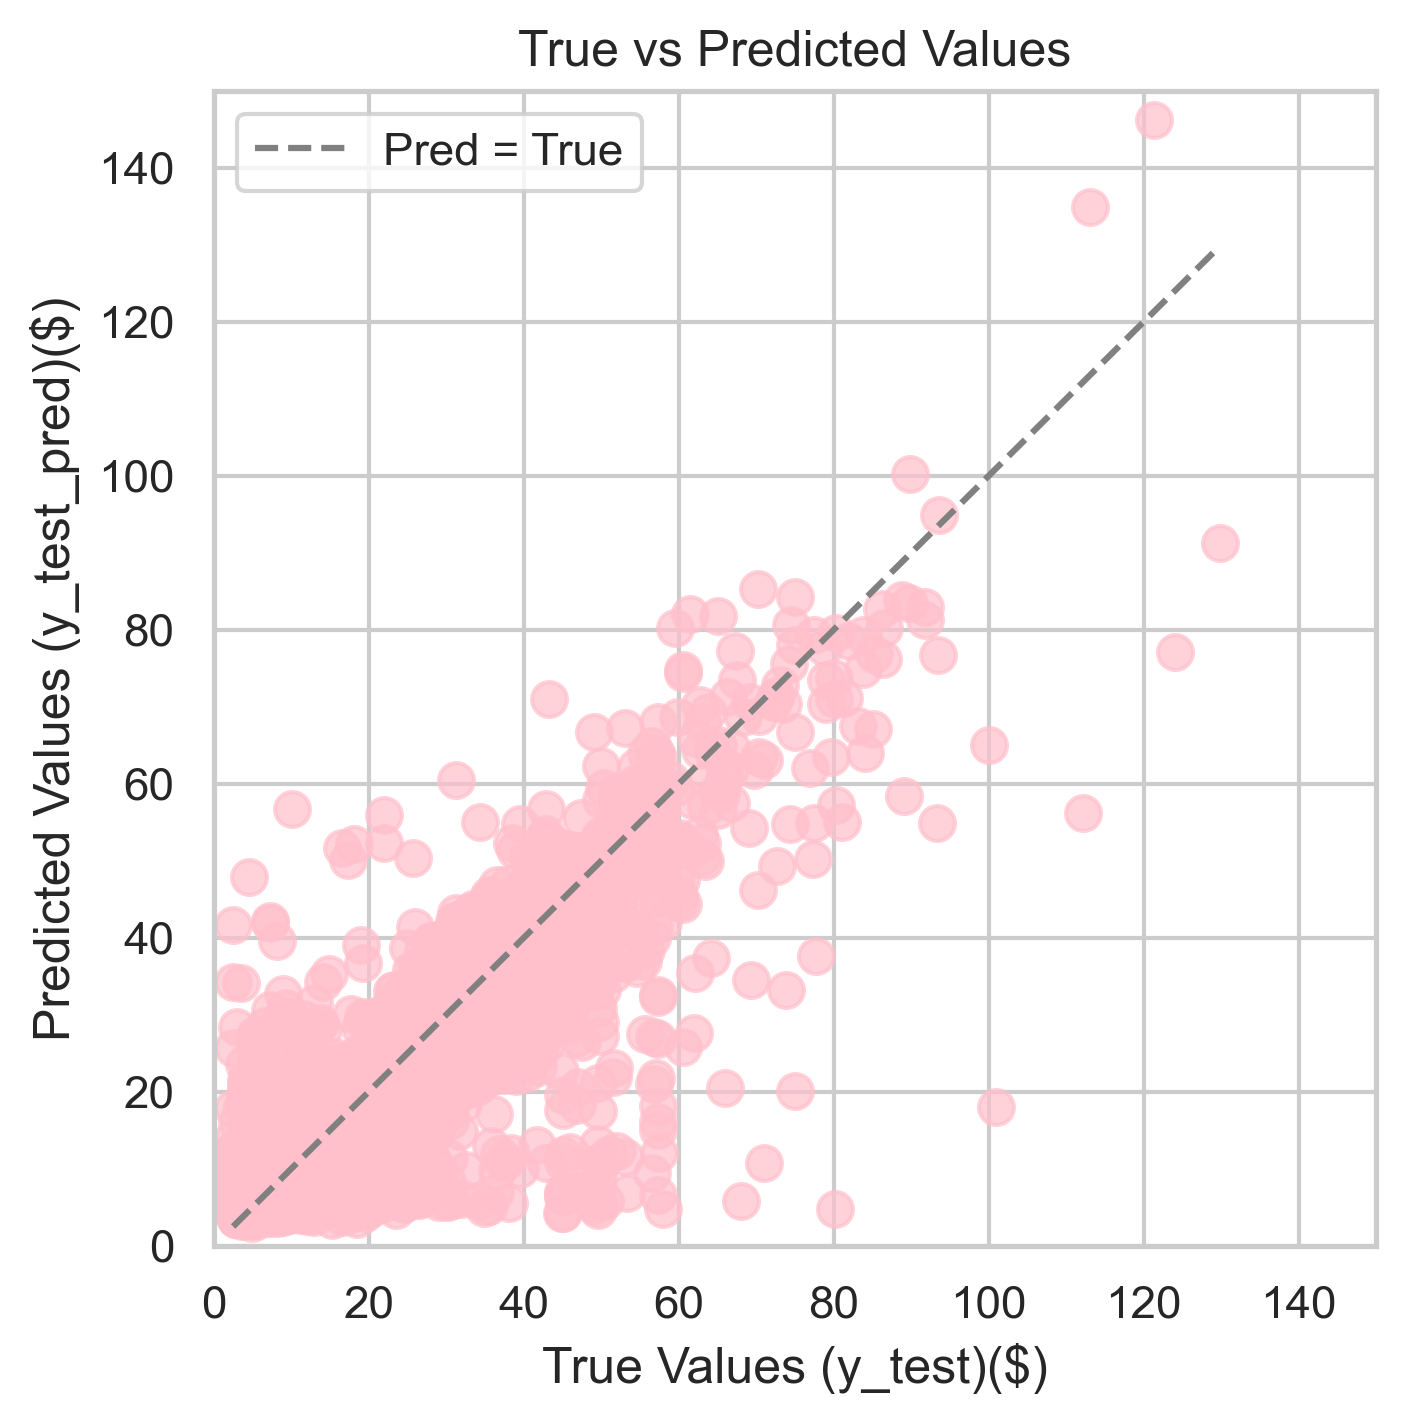

In [245]:
import matplotlib.pyplot as plt

# Create a scatter plot to compare y_test and y_test_pred
plt.figure(figsize=(5, 5), dpi = 300)

# Plot y_test vs y_test_pred (True vs Predicted values)
plt.scatter(y_test, y_test_pred, color='pink', alpha=0.7, s=70)

# Plot a line y=x for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='grey', linestyle='--', label='Pred = True')

# Labeling the plot
plt.title('True vs Predicted Values')
plt.xlabel('True Values (y_test)($)')
plt.ylabel('Predicted Values (y_test_pred)($)')
plt.grid(True)
plt.xlim(0, 150)
plt.ylim(0, 150)

# Add legend
plt.legend()

# Show the plot
plt.show()


## feature_importance

In [71]:
len(encoded_feature_names)

64

## permutation_importance

In [247]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Get the feature names after preprocessing
onehot_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(onehot_ftrs)
encoded_feature_names = np.concatenate([onehot_feature_names, minmax_ftrs, std_ftrs])

xgb_model = pipeline.named_steps['regressor']

# Calculate permutation importance
print("Calculating permutation importances...")
result = permutation_importance(
    xgb_model, X_test_transformed, y_test, n_repeats=5, random_state=42, n_jobs=-1
)

# Get the mean importance and standard deviation across repeats
importances = result.importances_mean
stds = result.importances_std

# Create a DataFrame to display the importances with feature names and standard deviations
importances_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': importances,
    'Std': stds
})

# Sort by importance in descending order and select top 5
importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the importances
print("Top 5 Permutation Importances of Features:")
print(importances_df.head(5))


Calculating permutation importances...
Top 5 Permutation Importances of Features:
             Feature  Importance       Std
0        distance_km    0.856056  0.004640
1  dropoff_longitude    0.127168  0.002488
2   dropoff_latitude    0.094124  0.001220
3   pickup_longitude    0.056532  0.000726
4    pickup_latitude    0.052322  0.000619


In [248]:
# For the least importance
print(importances_df.tail(3)['Feature'])


61    pickup_day_23
62     pickup_day_8
63    pickup_day_20
Name: Feature, dtype: object


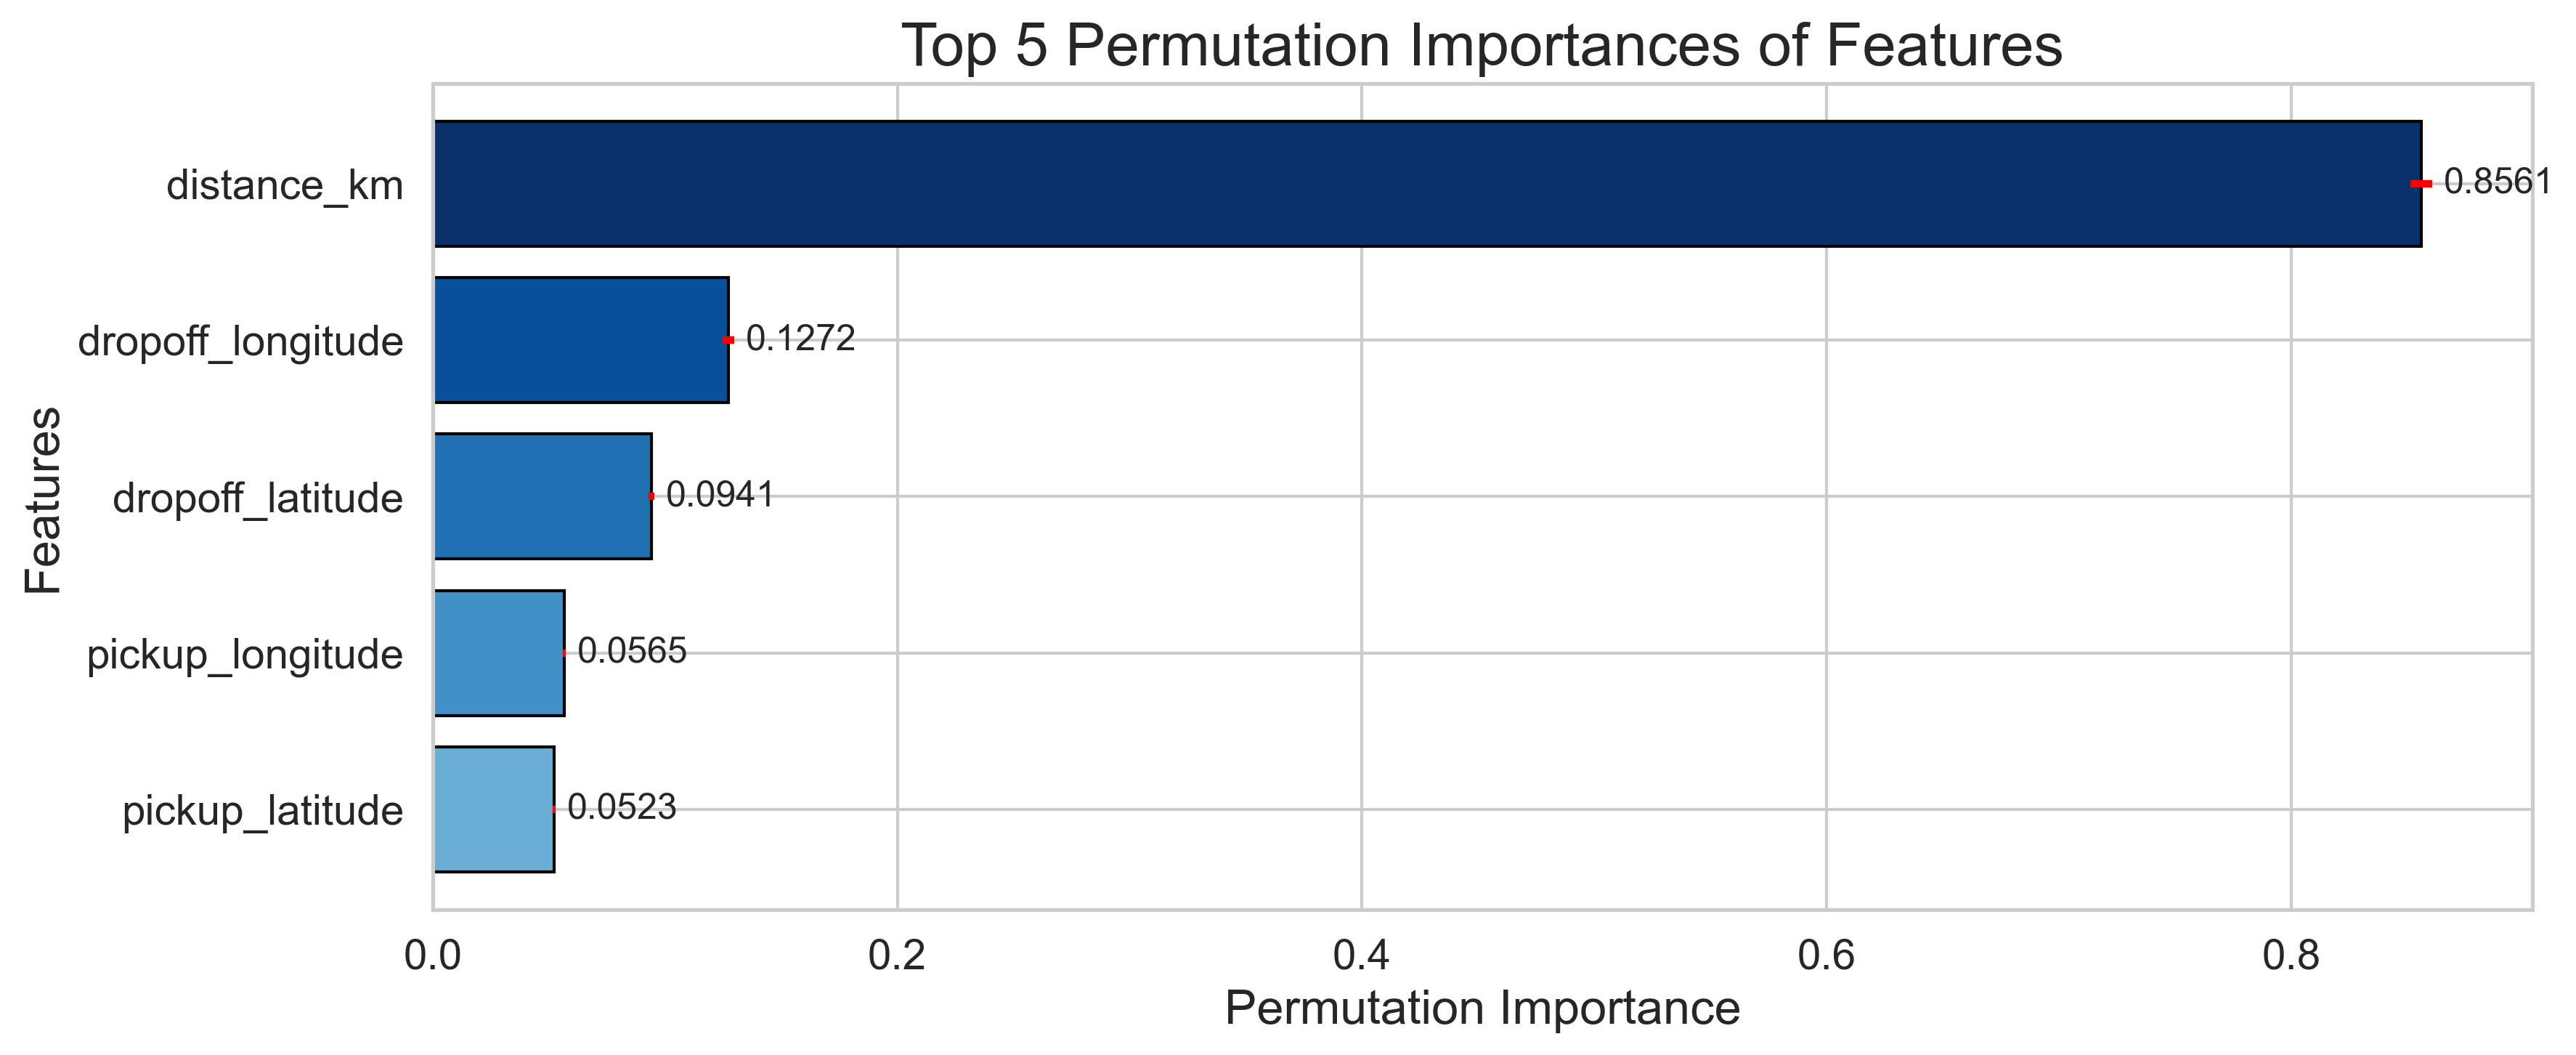

In [250]:
# Visualize the importances as a horizontal bar chart with error bars
plt.figure(figsize=(12, 5), dpi=300)

# Create the color map
cmap = plt.get_cmap('Blues')
colors = cmap(np.linspace(1, 0.5, len(importances_df.head(5)))) 

# The positions for the bars
positions = np.arange(len(importances_df.head(5)))

# Plot the bars with error bars
plt.barh(
    positions,
    importances_df.head(5)['Importance'],
    xerr=importances_df.head(5)['Std'],
    color=colors,
    edgecolor='black',
    align='center',
    error_kw={'ecolor': 'red', 'elinewidth': 2.5}
)

plt.yticks(positions, importances_df.head(5)['Feature'], fontsize=14)
plt.xticks(fontsize=14)

# Add the numerical importance values next to the bars
for i, (importance, std) in enumerate(zip(importances_df.head(5)['Importance'], importances_df['Std'])):
    plt.text(
        importance + std + 0.005, 
        i,                        
        f'{importance:.4f}',       
        va='center'
    )

plt.xlabel('Permutation Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Top 5 Permutation Importances of Features', fontsize=20)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()

## linear model weights

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

best_lasso_alpha = 0.1 

# Create the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_lasso_alpha, random_state=42)

# Create the pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_model)
])

# Train the Lasso model on the training set
lasso_pipeline.fit(X_train, y_train)

# Extract the trained Lasso model from the pipeline
lasso_trained = lasso_pipeline.named_steps['regressor']

# Get the coefficients from the trained Lasso model
coefficients = lasso_trained.coef_

# Get the feature names after preprocessing
onehot_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(onehot_ftrs)
encoded_feature_names = np.concatenate([onehot_feature_names, minmax_ftrs, std_ftrs])

# Create a DataFrame to align coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Coefficient': coefficients
})

# Calculate the absolute value of coefficients for sorting
coef_df['Coef_Magnitude'] = np.abs(coef_df['Coefficient'])

# Sort the DataFrame by coefficient magnitude in descending order
coef_df_sorted = coef_df.sort_values(by='Coef_Magnitude', ascending=False)

# Select the top 5 features
top_features = coef_df_sorted.head(5).reset_index(drop=True)

print("Top 5 Features Based on Coefficient Magnitudes:")
print(top_features[['Feature', 'Coefficient']])



Top 5 Features Based on Coefficient Magnitudes:
            Feature  Coefficient
0       distance_km     7.800047
1  pickup_year_2014     1.062623
2  pickup_year_2013     0.799455
3  pickup_year_2015     0.357477
4  pickup_year_2009    -0.183653


In [253]:
coef_df_sorted.tail(3)['Feature']

28      pickup_day_10
29      pickup_day_11
63    passenger_count
Name: Feature, dtype: object

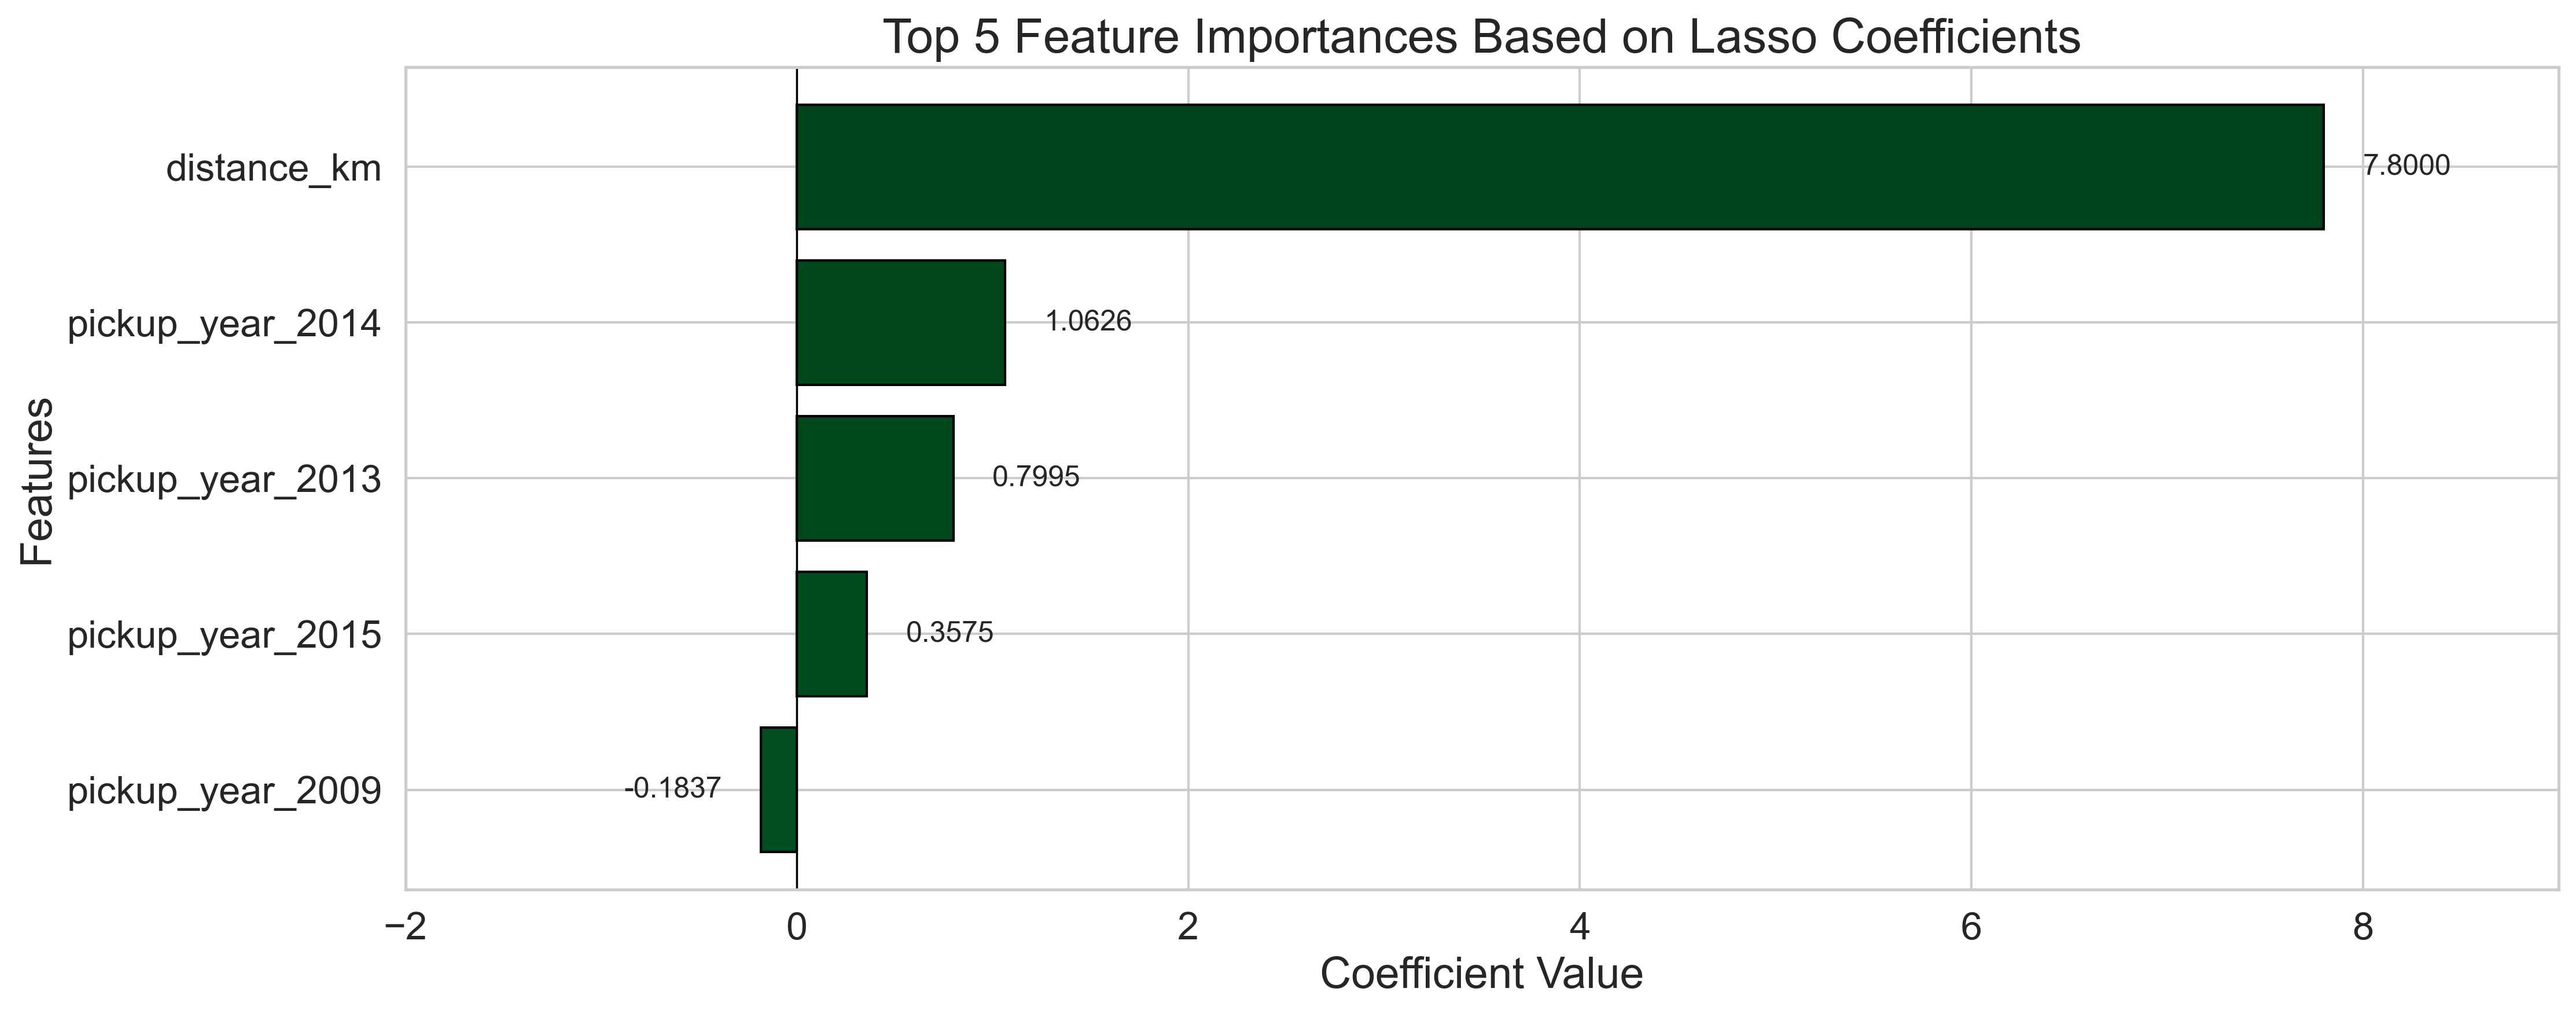

In [255]:
# Plot the top features
plt.figure(figsize=(15, 6), dpi=300)

# Create the color map
cmap = plt.get_cmap('Greens')
colors = cmap(np.linspace(1, 0.5, len(importances_df))) 

# The positions for the bars
positions = np.arange(len(top_features))
# Plot the bars
plt.barh(
    positions,
    top_features['Coefficient'],
    color=colors,
    edgecolor='black',
    align='center'
)

plt.yticks(positions, top_features['Feature'], fontsize=16)
plt.xticks(fontsize=16)

for i, coefficient in enumerate(top_features['Coefficient']):
    
    if coefficient >= 0:
        plt.text(
            coefficient + 0.2,  
            i,
            f'{coefficient:.4f}',
            va='center',
            ha='left'
        )
    else:
        plt.text(
            coefficient - 0.2, 
            i,
            f'{coefficient:.4f}',
            va='center',
            ha='right'
        )

plt.xlabel('Coefficient Value', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Top 5 Feature Importances Based on Lasso Coefficients', fontsize=20)
plt.axvline(0, color='black', linewidth=0.8) 
plt.xlim(-2, 9) 
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()

## random forest built in function

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Best hyperparameters from subsample experiment for RandomForestRegressor
best_rf_params = {
    'randomforestregressor__max_depth': 20,
    'randomforestregressor__max_features': 0.5,
    'randomforestregressor__n_estimators': 100
}

# Create the Random Forest model with the best hyperparameters
rf_model = RandomForestRegressor(
    max_depth=best_rf_params['randomforestregressor__max_depth'],
    max_features=best_rf_params['randomforestregressor__max_features'],
    n_estimators=best_rf_params['randomforestregressor__n_estimators']
)

# Create the pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

rf_pipeline.fit(X_train, y_train)

# Extract the trained RandomForestRegressor model from the pipeline
rf_model = rf_pipeline.named_steps['regressor']

# Get the feature importances from the trained RandomForestRegressor model
importances = rf_model.feature_importances_

# Get the feature names after preprocessing
# Retrieve feature names from each transformer in the preprocessor
def get_feature_names(preprocessor):
    feature_names = []
    
    for name, transformer, features in preprocessor.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                names = transformer.get_feature_names_out(features)
            else:
                names = features
            feature_names.extend(names)
        else:
            if transformer == 'passthrough':
                feature_names.extend(features)
    return feature_names

# Get the feature names
encoded_feature_names = get_feature_names(preprocessor)

# Ensure the number of feature names matches the number of importances
assert len(encoded_feature_names) == len(importances), "Mismatch between feature names and importances"

# Create a DataFrame to align feature importances with feature names
importances_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = importances_df_sorted.head(5).reset_index(drop=True)

print("Top 5 Features Based on Random Forest Feature Importances:")
print(top_features)

Top 5 Features Based on Random Forest Feature Importances:
             Feature  Importance
0        distance_km    0.656775
1   pickup_longitude    0.108389
2  dropoff_longitude    0.102620
3   dropoff_latitude    0.038322
4    pickup_latitude    0.028397


In [257]:
importances_df_sorted.tail(3)['Feature']

43    pickup_day_25
46    pickup_day_28
47    pickup_day_29
Name: Feature, dtype: object

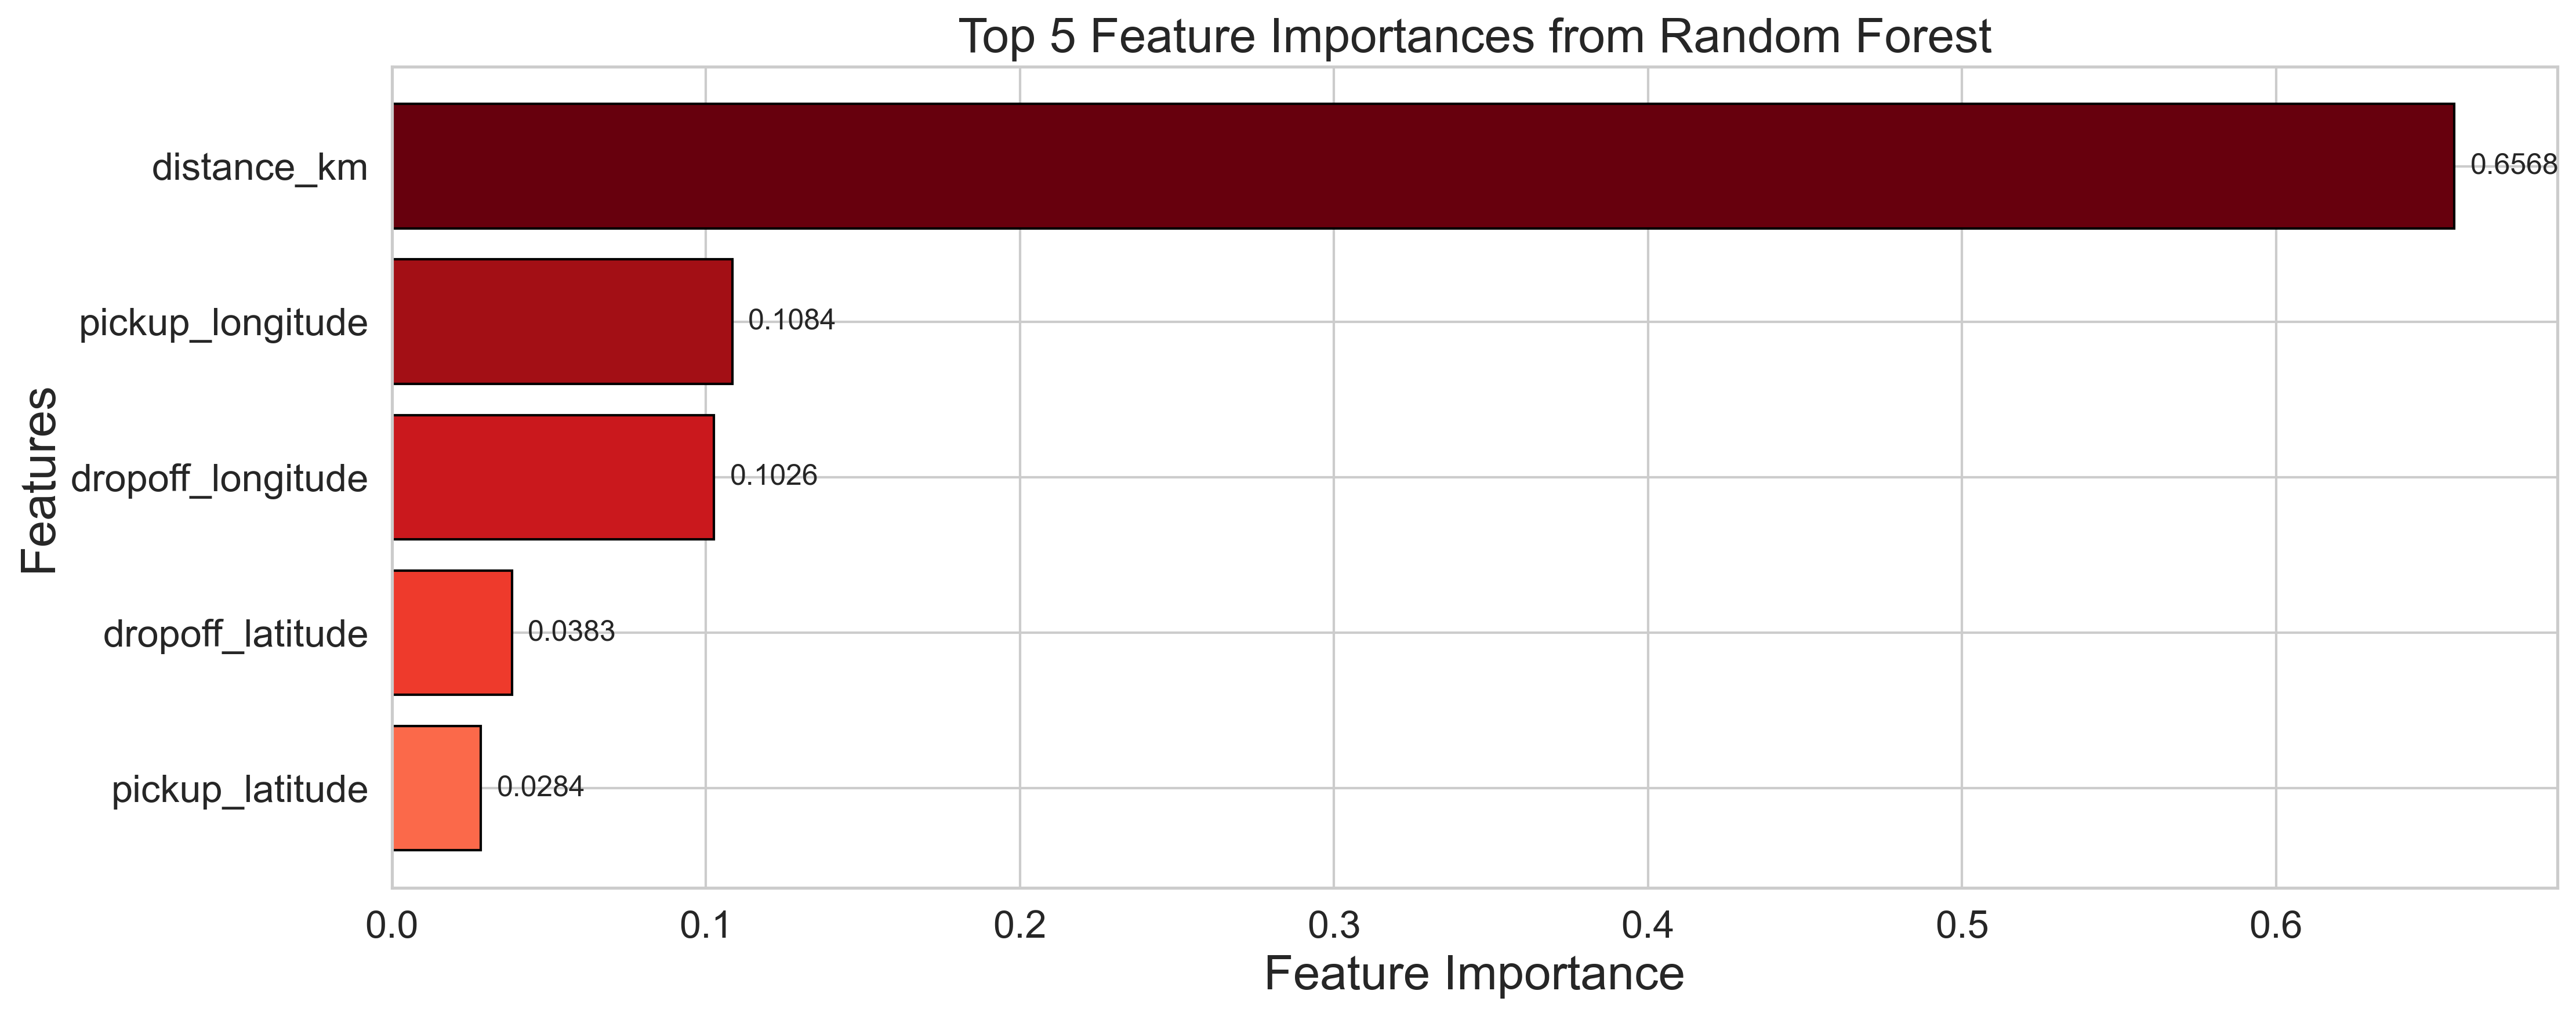

In [259]:
# Plot the top features
plt.figure(figsize=(15, 6), dpi=300)

# Create the color map
cmap = plt.get_cmap('Reds')
colors = cmap(np.linspace(1, 0.5, len(top_features)))

# The positions for the bars
positions = np.arange(len(top_features))

# Plot the bars
plt.barh(
    positions,
    top_features['Importance'],
    color=colors,
    edgecolor='black',
    align='center'
)

# Set the y-ticks and labels
plt.yticks(positions, top_features['Feature'], fontsize=16)
plt.xticks(fontsize=16)



# Add the numerical importance values next to the bars
for i, importance in enumerate(top_features['Importance']):
    plt.text(
        importance + 0.005,
        i,
        f'{importance:.4f}',
        va='center',
        ha='left'
    )

plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('Top 5 Feature Importances from Random Forest', fontsize=20)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.pipeline import Pipeline

#make sure it is the best parameter
best_xgb_params = {
    'xgbregressor__colsample_bytree': 0.66, 
    'xgbregressor__learning_rate': 0.2, 
    'xgbregressor__max_depth': 10, 
    'xgbregressor__n_estimators': 100, 
    'xgbregressor__reg_alpha': 100.0, 
    'xgbregressor__reg_lambda': 1.0, 
    'xgbregressor__subsample': 0.9
}

# Create the XGBoost model with the best hyperparameters
xgb_model = xgb.XGBRegressor(**best_xgb_params)

# Create the pipeline with the preprocessor and XGBoost model
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# Train the XGBoost pipeline on the training set
xgb_pipeline.fit(X_train, y_train)

# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Get the trained XGBoost model from the pipeline
xgb_trained = xgb_pipeline.named_steps['regressor']

# Use the booster to get SHAP values
booster = xgb_trained.get_booster()

# Convert the transformed test data to DMatrix
dtest = xgb.DMatrix(X_test_transformed)

# Calculate SHAP values using the booster predict method with pred_contribs=True
shap_values = booster.predict(dtest, pred_contribs=True)

# Exclude the last column (bias term)
shap_values = shap_values[:, :-1]

# Get the feature names
encoded_feature_names = get_feature_names(preprocessor)

# Ensure the number of feature names matches the number of SHAP values
assert len(encoded_feature_names) == shap_values.shape[1], "Mismatch between feature names and SHAP values"

# Calculate mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Create a DataFrame to align SHAP values with feature names
shap_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'MeanAbsSHAP': mean_abs_shap_values
})

# Sort the DataFrame by mean absolute SHAP value in descending order
shap_df_sorted = shap_df.sort_values(by='MeanAbsSHAP', ascending=False)

# Select the top 10 features
top_features = shap_df_sorted.head(10).reset_index(drop=True)

# Print the top features
print("Top 10 Features Based on Mean Absolute SHAP Values:")
print(top_features)


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:37:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1724807611129/work/src/learner.cc:740: 
Parameters: { "xgbregressor__colsample_bytree", "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators", "xgbregressor__reg_alpha", "xgbregressor__reg_lambda", "xgbregressor__subsample" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 Features Based on Mean Absolute SHAP Values:
                 Feature  MeanAbsSHAP
0            distance_km     5.188623
1            pickup_hour     0.512085
2       pickup_year_2014     0.431625
3       dropoff_latitude     0.429960
4      dropoff_longitude     0.413356
5       pickup_year_2013     0.379085
6       pickup_longitude     0.374063
7        pickup_latitude     0.257554
8       pickup_year_2015     0.238487
9  pickup_weekday_Sunday     0.109283


In [261]:
shap_df_sorted.tail(3)['Feature']

48    pickup_day_30
36    pickup_day_18
46    pickup_day_28
Name: Feature, dtype: object

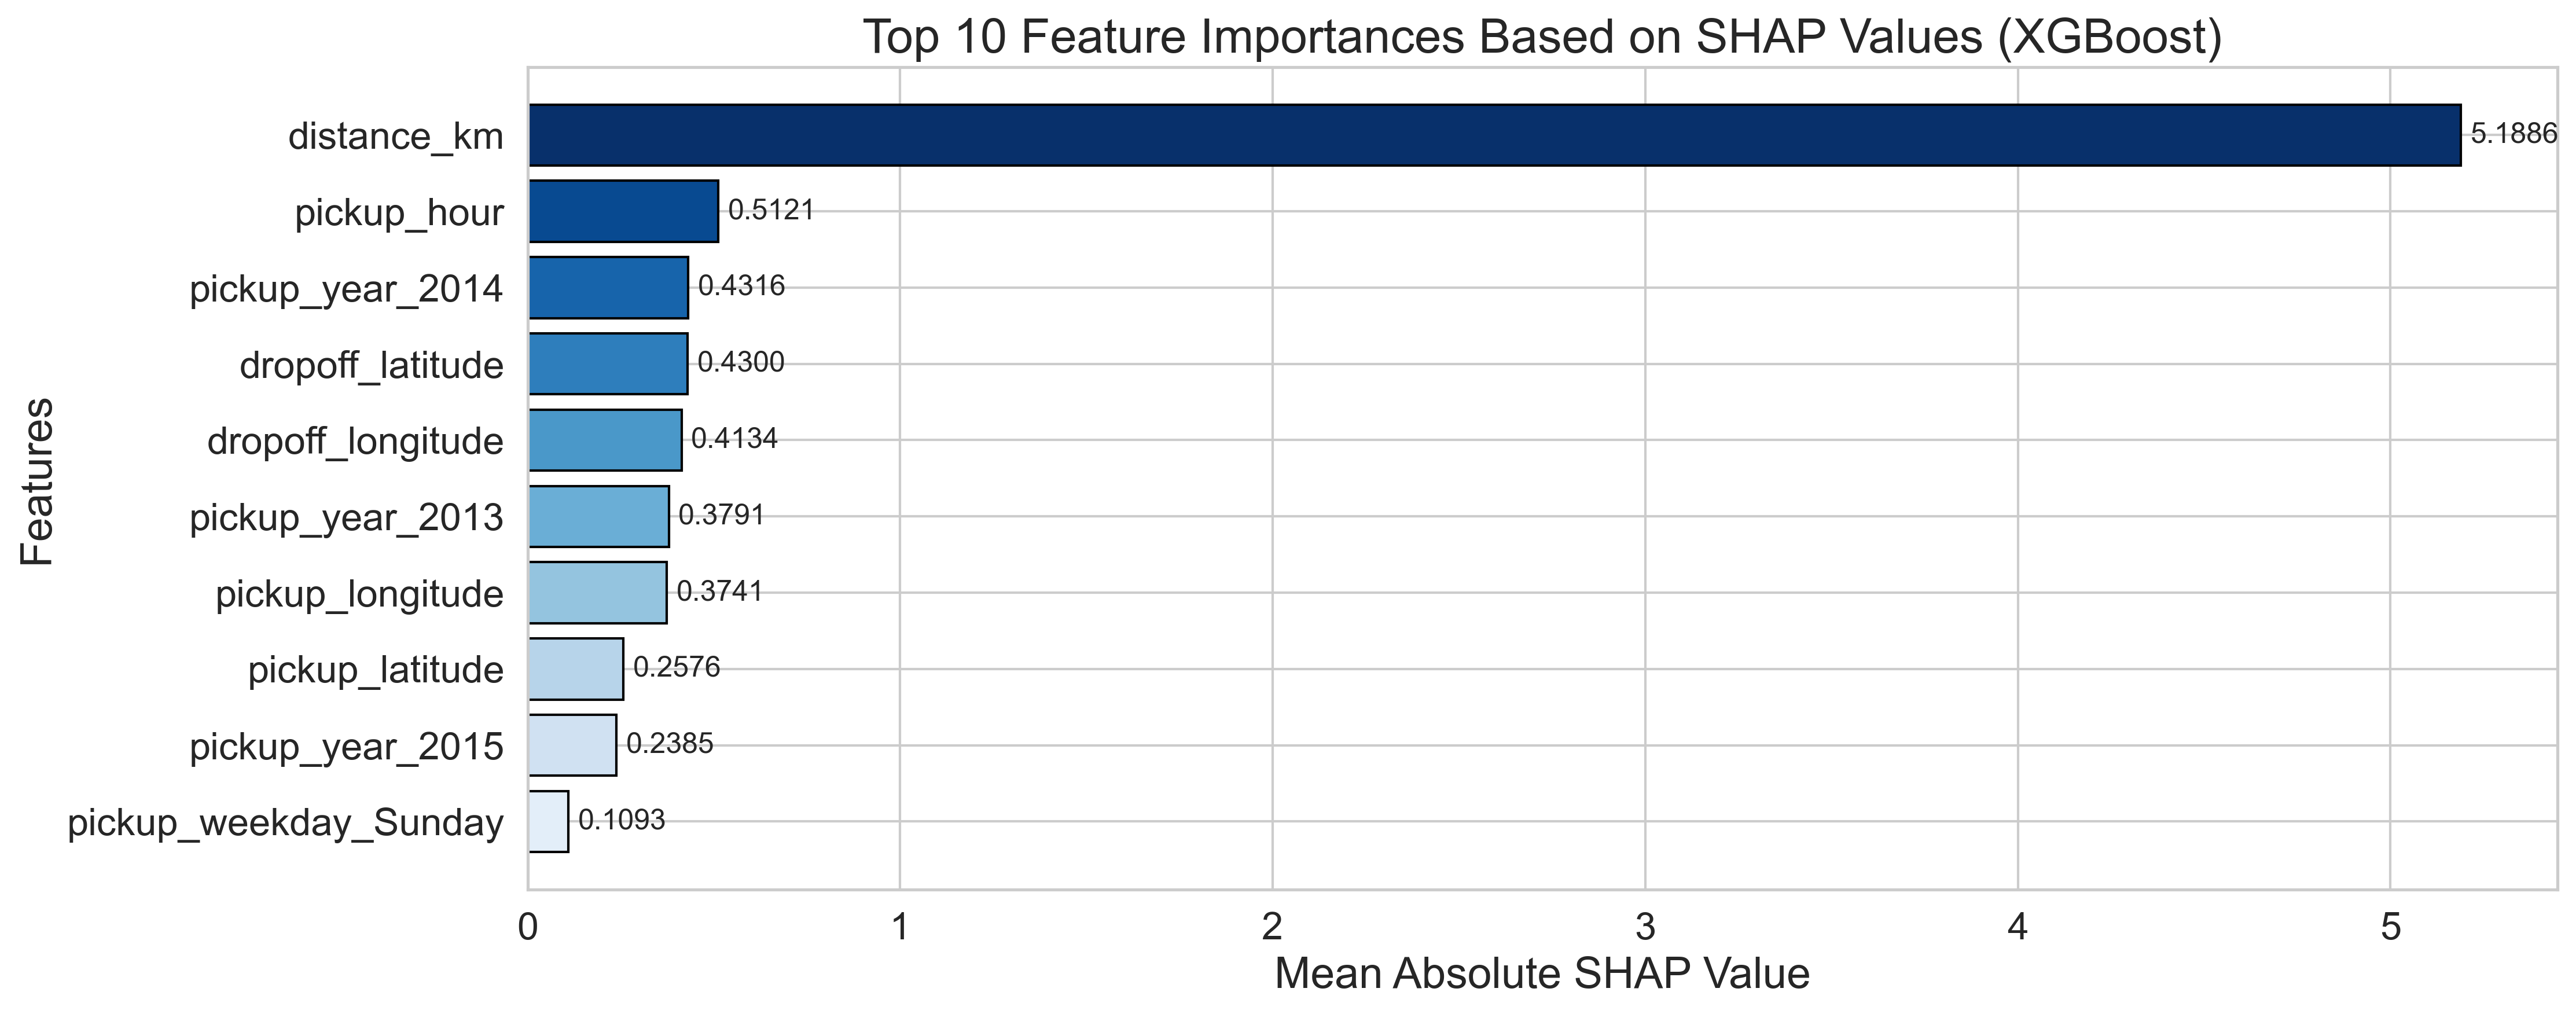

In [262]:
# Plot the top features
plt.figure(figsize=(15, 6), dpi=300)

# Create the color map
cmap = plt.get_cmap('Blues')
colors = cmap(np.linspace(1, 0.1, len(top_features)))

# Positions for the bars
positions = np.arange(len(top_features))

# Plot the bars
plt.barh(
    positions,
    top_features['MeanAbsSHAP'],
    color=colors,
    edgecolor='black',
    align='center'
)

# Set the y-ticks and labels
plt.yticks(positions, top_features['Feature'], fontsize=16)
plt.xticks(fontsize=16)

# Add the numerical SHAP values next to the bars
for i, value in enumerate(top_features['MeanAbsSHAP']):
    plt.text(
        value + 0.005 * max(top_features['MeanAbsSHAP']),  
        i,
        f'{value:.4f}',
        va='center',
        ha='left'
    )

plt.xlabel('Mean Absolute SHAP Value', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Top 10 Feature Importances Based on SHAP Values (XGBoost)', fontsize=20)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()

## local importance

In [96]:
print(f"Number of rows in X_test_transformed: {X_test_transformed.shape[0]}")


Number of rows in X_test_transformed: 38408


In [202]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(booster)

shap_values_single_row = explainer.shap_values(X_test_transformed[12:13, :])

shap.force_plot(
    explainer.expected_value,         
    shap_values_single_row[0],       
    X_test_transformed[12],           
    feature_names=encoded_feature_names, 
    show=True                        
)


In [203]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(booster)

shap_values_single_row = explainer.shap_values(X_test_transformed[15000:15001, :])

shap.force_plot(
    explainer.expected_value,        
    shap_values_single_row[0],      
    X_test_transformed[15000],         
    feature_names=encoded_feature_names,  
    show=True                        
)
